# Lead Scoring Case Study

## Problem Statement AND Objective 

X Education, an online course provider, seeks to improve its lead conversion rate, which currently stands at 30%. They aim to identify "Hot Leads" – those most likely to convert into paying customers. By doing so, they can focus their sales efforts on the most promising leads and increase the conversion rate, with a target of 80% <br>ves
Develop a model to assign a lead score to each lead, prioritizing those with higher chances of conversion. Data Utilization: Use attributes like Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc., to predict lead conversion. Handling Missing Data: Address categorical variables with levels like 'Select' that represent missing values. Improve Conversion Rate: Achieve a lead conversion rate of 80% by focusing on the most likely leads.

## Step 1: Reading and Understanding the Data

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [8]:
lead_df = pd.read_csv('Leads.csv')# Loading dataset

lead_df_original = lead_df.copy()
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [10]:
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [12]:
# Inspect the various aspects of the data dataframe
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2:Exploratory Data Analysis

In [15]:
# To check for duplicates
lead_df.loc[lead_df.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

##### As we could see , there are no duplicates


In [18]:
# To check for duplicates in columns
print(sum(lead_df.duplicated(subset = 'Lead Number')))
print(sum(lead_df.duplicated(subset = 'Prospect ID')))

0
0


###### As the values in these columns are different for data point, they are not important from an analysis point of view. Hence, can be dropped.

In [21]:
lead_df = lead_df.drop(['Lead Number','Prospect ID'],axis = 1)

###### 'Select' seems to be the default value stored in the backend for columns that are optional in nature and the prospective lead has chosen not to select any of options available in the dropdown menu.

In [412]:
# To convert 'Select' values to NaN
lead_df = lead_df.replace('Select', np.nan)

In [26]:
# To get percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

##### Dropping all those which have null percentage greater than 50%. But the variable 'Lead Quality', which has 51.6% missing values seems important. So we'll keep it for now.

In [29]:
# To drop columns with more than 50% of missing values as it does not make sense to impute these many values
lead_df = lead_df.drop(lead_df.loc[:,list(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)>52)].columns, axis = 1)

In [31]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad


- For categorical variables, we'll analyse the count/percentage plots.
- For numerical variable, we'll describe the variable and analyse the box plots.

In [34]:
# Function for percentage plots
def percent_plot(var):
    values = (lead_df[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

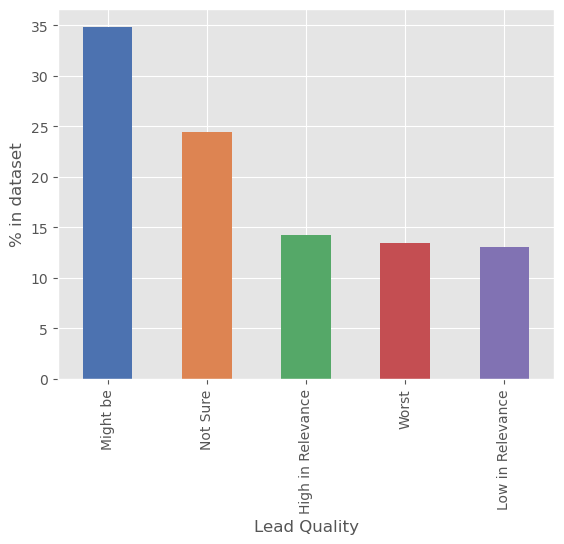

In [36]:
# For Lead Quality
percent_plot('Lead Quality')

##### Null values in the 'Lead Quality' column can be imputed with the value 'Not Sure' as we can assume that not filling in a column means the employee does not know or is not sure about the option.

In [39]:
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

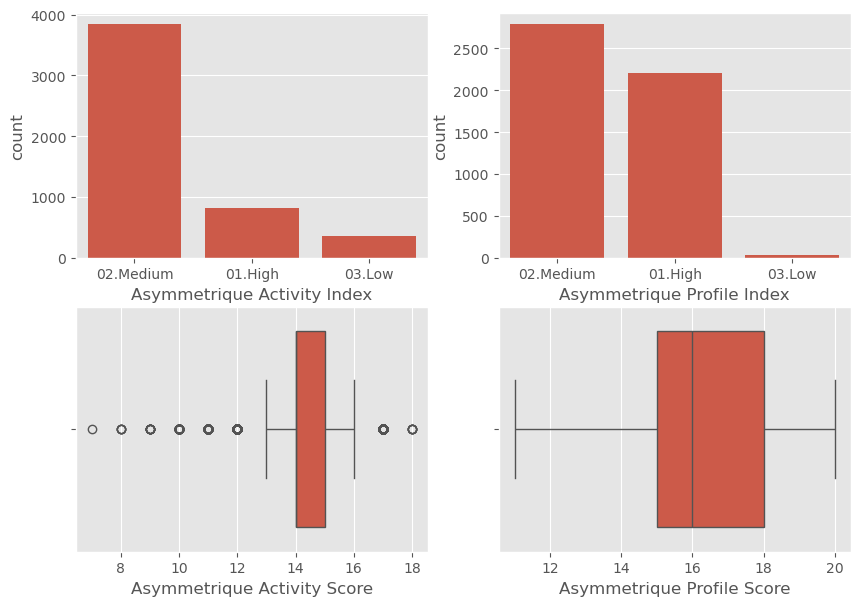

In [41]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(data=lead_df, x=var)
    else:
        sns.boxplot(data=lead_df, x=var)
plt.show()

In [42]:
# To describe numerical variables
lead_df[asym_list].describe()

Asymmetrique Activity Score  Asymmetrique Profile Score
count                  5022.000000                 5022.000000
mean                     14.306252                   16.344883
std                       1.386694                    1.811395
min                       7.000000                   11.000000
25%                      14.000000                   15.000000
50%                      14.000000                   16.000000
75%                      15.000000                   18.000000
max                      18.000000                   20.000000

##### These four variables have more than 45% missing values and it can be seen from the plots that there is a lot of variation in them. So, it's not a good idea to impute 45% of the data. Even if we impute with mean/median for numerical variables, these values will not have any significant importance in the model. We'll have to drop these variables.

In [46]:
lead_df = lead_df.drop(asym_list,axis = 1)

In [48]:
# To see percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

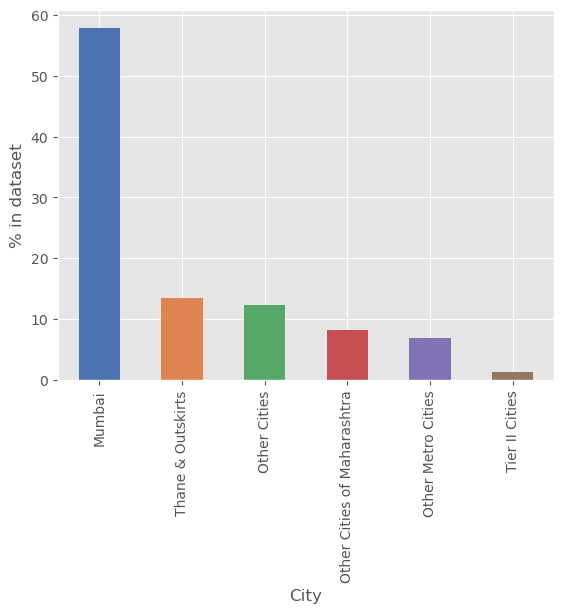

In [50]:
# For 'City'
percent_plot('City')

#### Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.

In [53]:
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

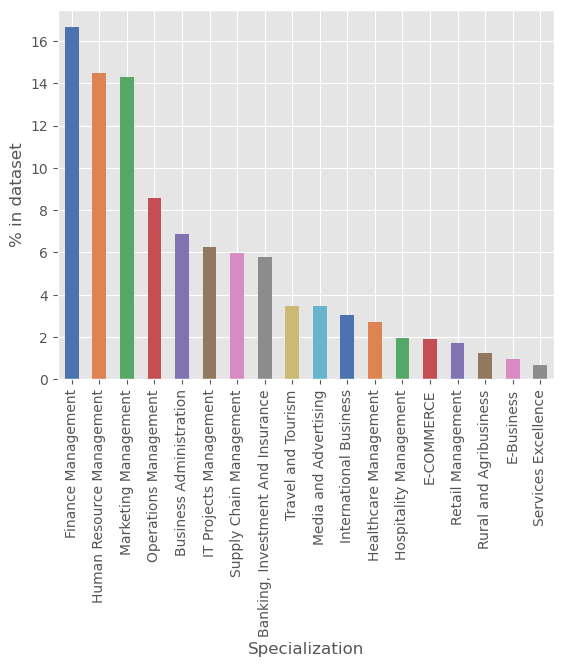

In [55]:
# For 'Specialization'
percent_plot('Specialization')

###### There are a lot of different specializations and it's not accurate to directly impute with the mean. It is possible that the person does not have a specialization or his/her specialization is not in the options. We can create a new column for that.

In [58]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

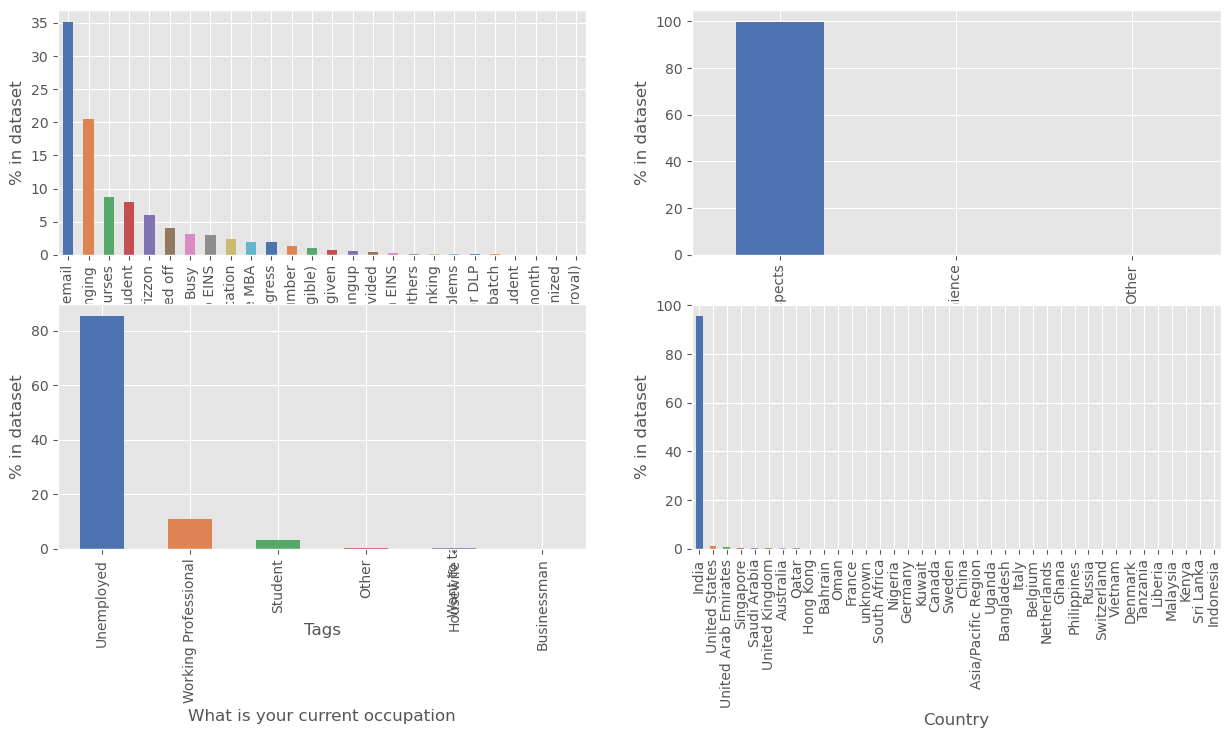

In [60]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']
plt.figure(figsize=(15, 7))
for var in var_list:
    plt.subplot(2,2,var_list.index(var)+1)
    percent_plot(var)

#### In all these categorical variables, one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [62]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = lead_df[var].describe()['top']
    lead_df[var] = lead_df[var].replace(np.nan, top_frequent)

In [63]:
# Let's see percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

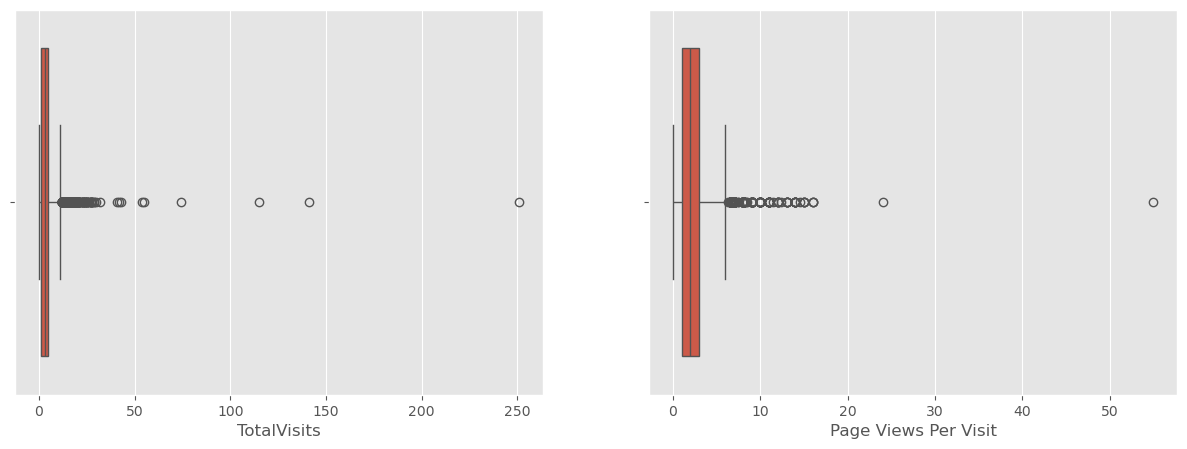

TotalVisits  Page Views Per Visit
count  9103.000000           9103.000000
mean      3.445238              2.362820
std       4.854853              2.161418
min       0.000000              0.000000
25%       1.000000              1.000000
50%       3.000000              2.000000
75%       5.000000              3.000000
max     251.000000             55.000000

In [64]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(data=lead_df, x=var)
plt.show()

lead_df[visit_list].describe()

#### From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values.

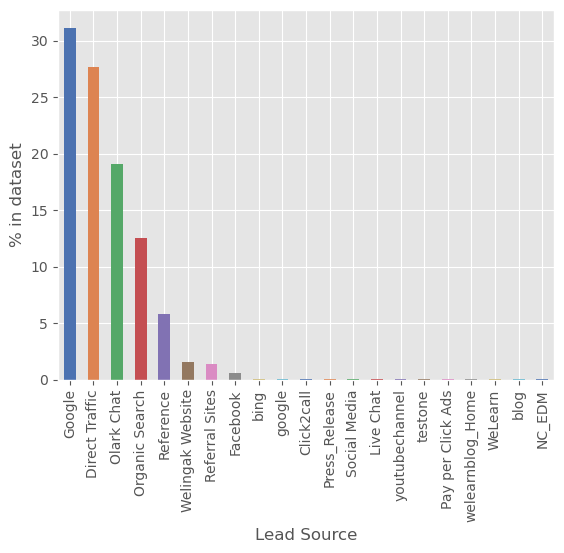

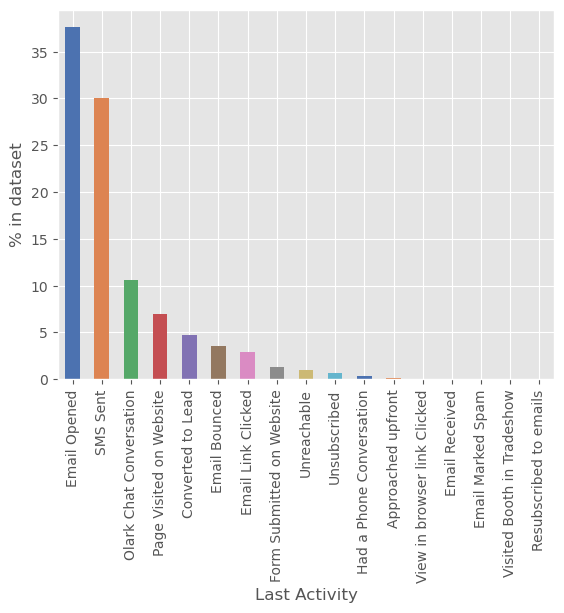

In [69]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

#### In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. Hence, we'll drop the rows containing any missing missing values for above four variables.

In [72]:
# To drop the rows containing missing values
lead_df.dropna(inplace = True)

In [73]:
# Let's see percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### Great! No more missing values.

## Step 3: Data Visualtization

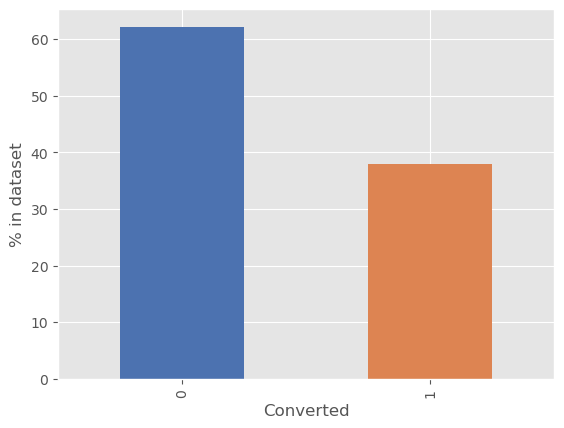

In [79]:
# For the target variable 'Converted'
percent_plot('Converted')

In [81]:
(sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100

37.85541106458012

#### 37.8% of the 'Converted' data is 1 ie. 37.8% of the leads are converted. This means we have enough data of converted leads for modelling.

### Visualising Numerical Variables and Outlier Treatment

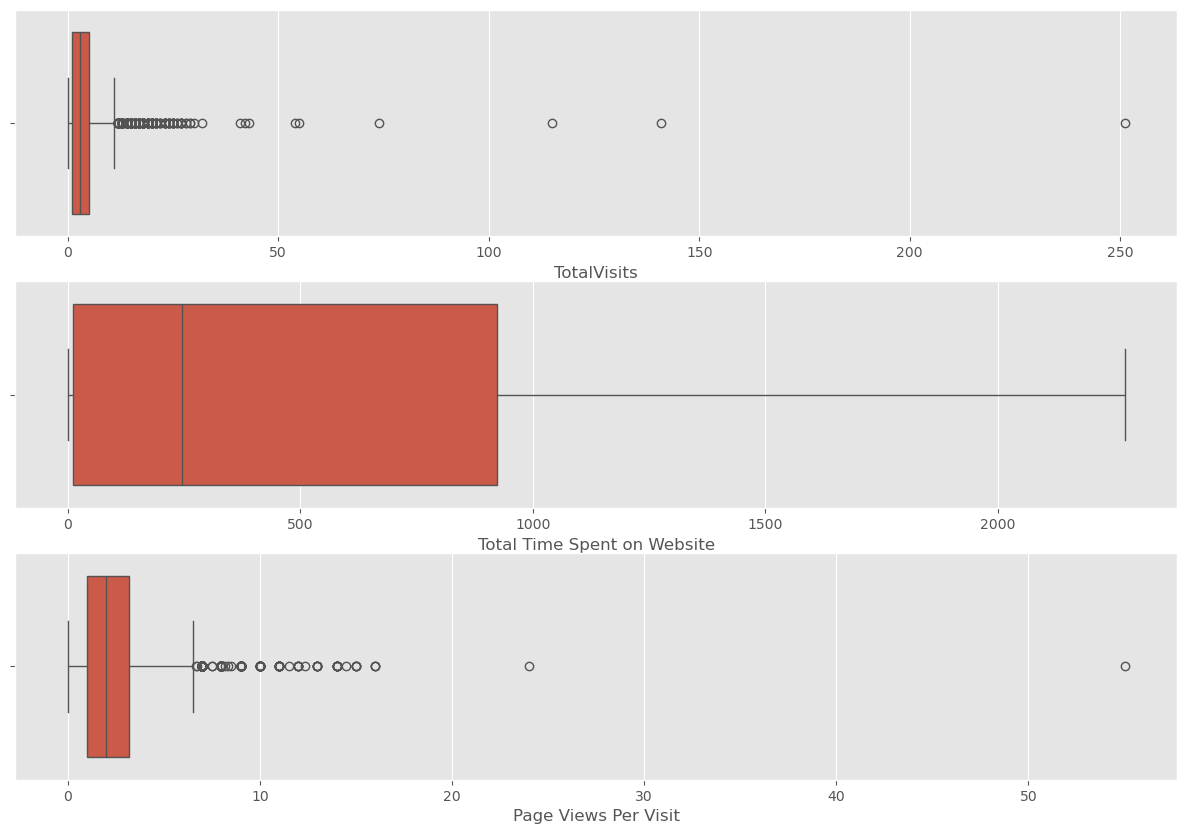

In [85]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=lead_df, x=var)
plt.show()

In [86]:
lead_df[num_var].describe([0.05,.25, .5, .75, .90, .95])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
5%        0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
max     251.000000                  2272.000000             55.000000

##### Use of boxplots,to check for outliers in  the data
- For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
- There are no significant outliers in 'Total Time Spent on Website'
- For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

In [91]:
# Outlier treatment
percentile = lead_df['TotalVisits'].quantile([0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = lead_df['Page Views Per Visit'].quantile([0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentile[0]] = percentile[0]

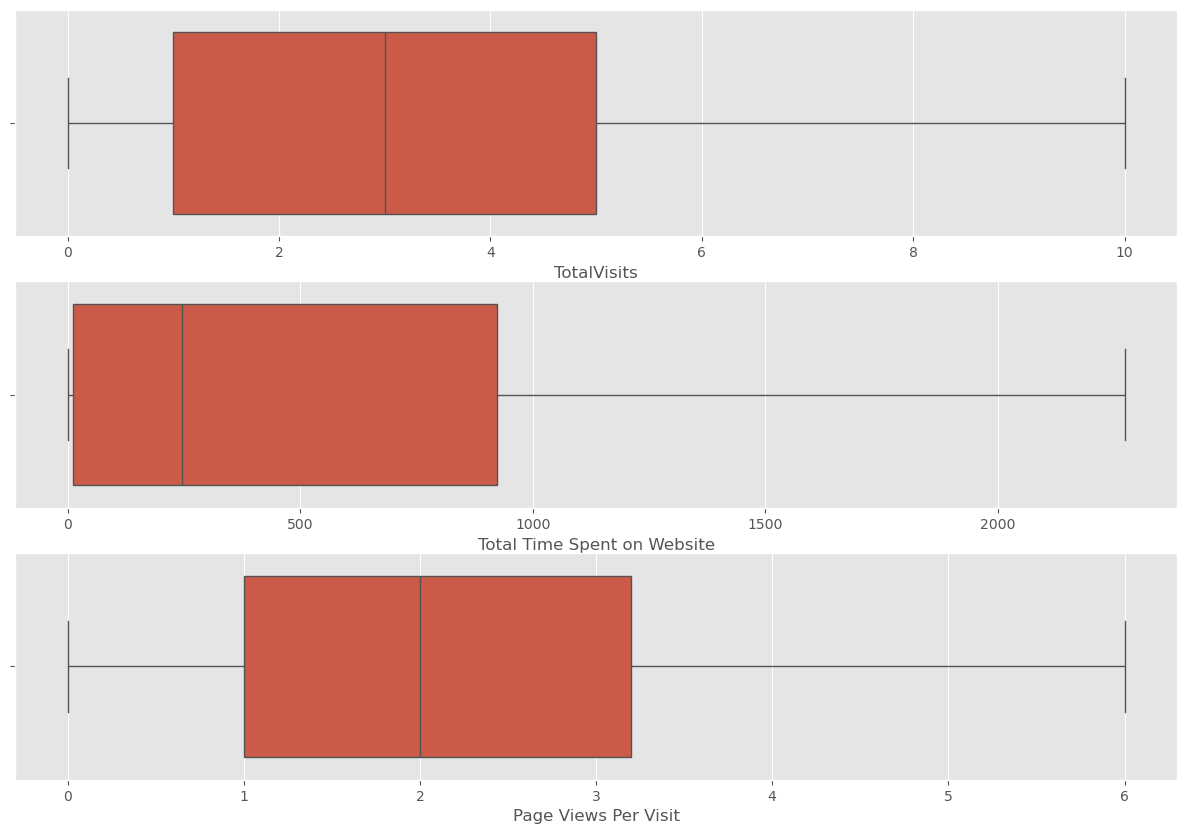

In [93]:
# Plot Boxplots to verify 
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=lead_df, x=var)
plt.show()

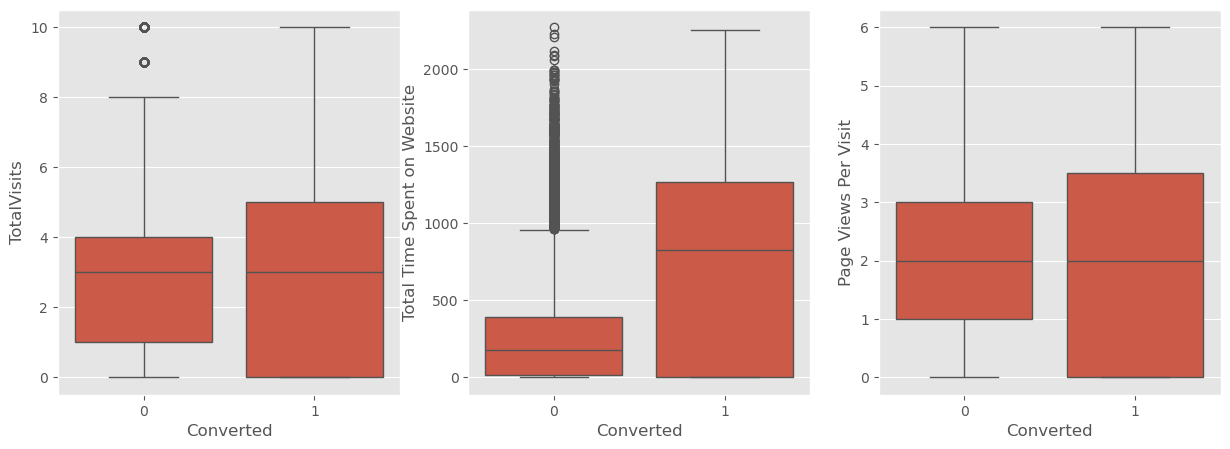

In [94]:
# To plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = lead_df)
plt.show()


#### **Observations:**  
- 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.
- People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.
- 'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

### Visualising Categorical Variables

In [98]:
# Categorical variables
cat_var = list(lead_df.columns[lead_df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

###### We saw percentage plots for categorical variables while cleaning the data. Here, we'll see these plots with respect to target variable 'Converted'

In [102]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = lead_df)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = lead_df)
        plt.xticks(rotation = 90)
    plt.show()

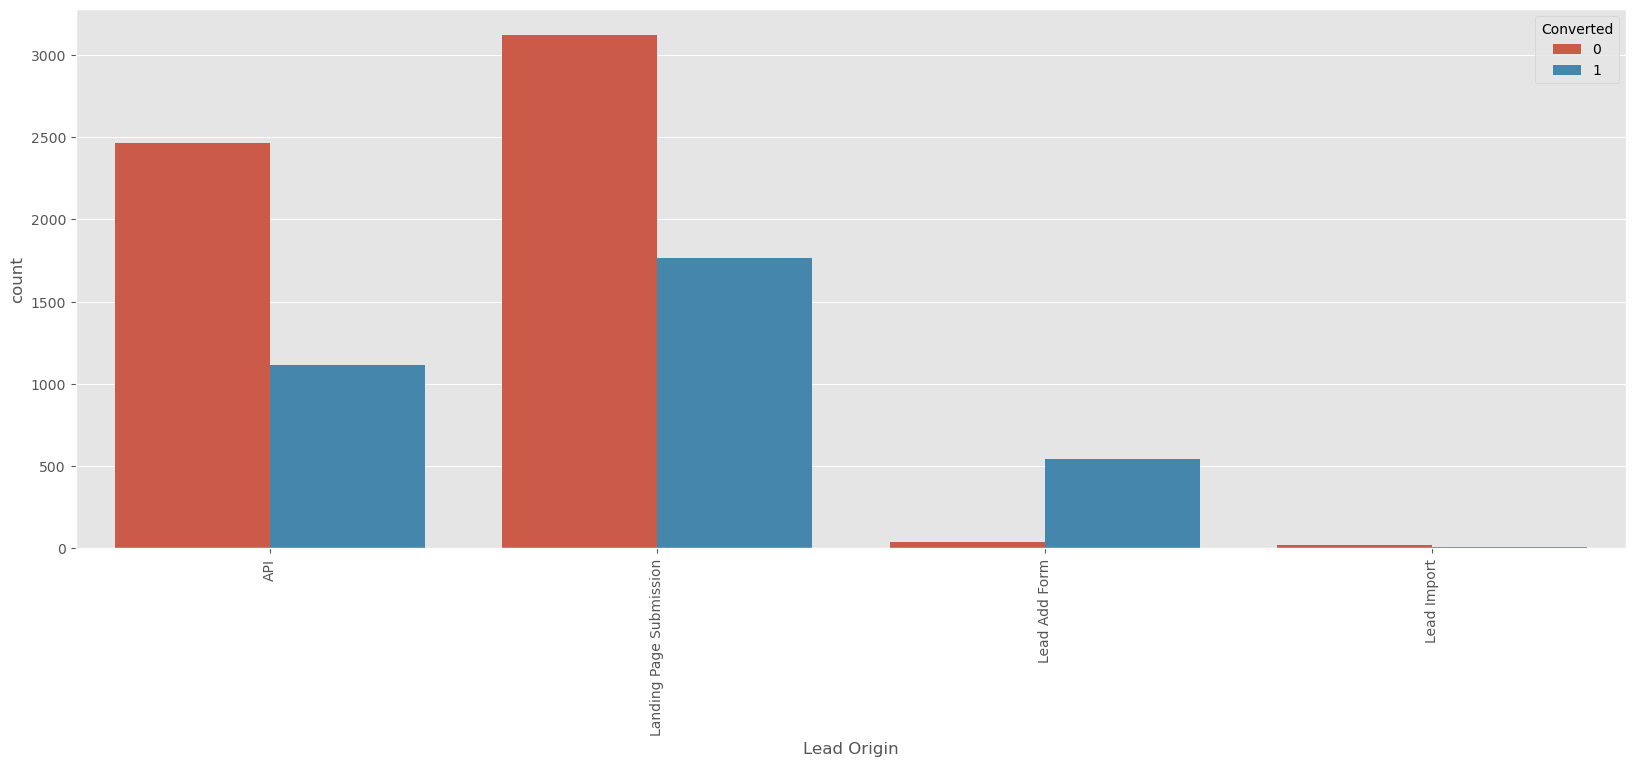

In [104]:
plot_cat_var(cat_var[0])

### **Observations for Lead Origin:**  
To improve overall performance, we should focus on increasing the conversion rate for 'API' and 'Landing Page Submission', both of which generate the most leads but have a conversion rate of around 30%. Additionally, we should work on boosting lead generation through the 'Lead Add Form', which has a strong conversion rate despite fewer leads. The 'Lead Import' channel seems to have minimal impact and may not require significant focus at this time.

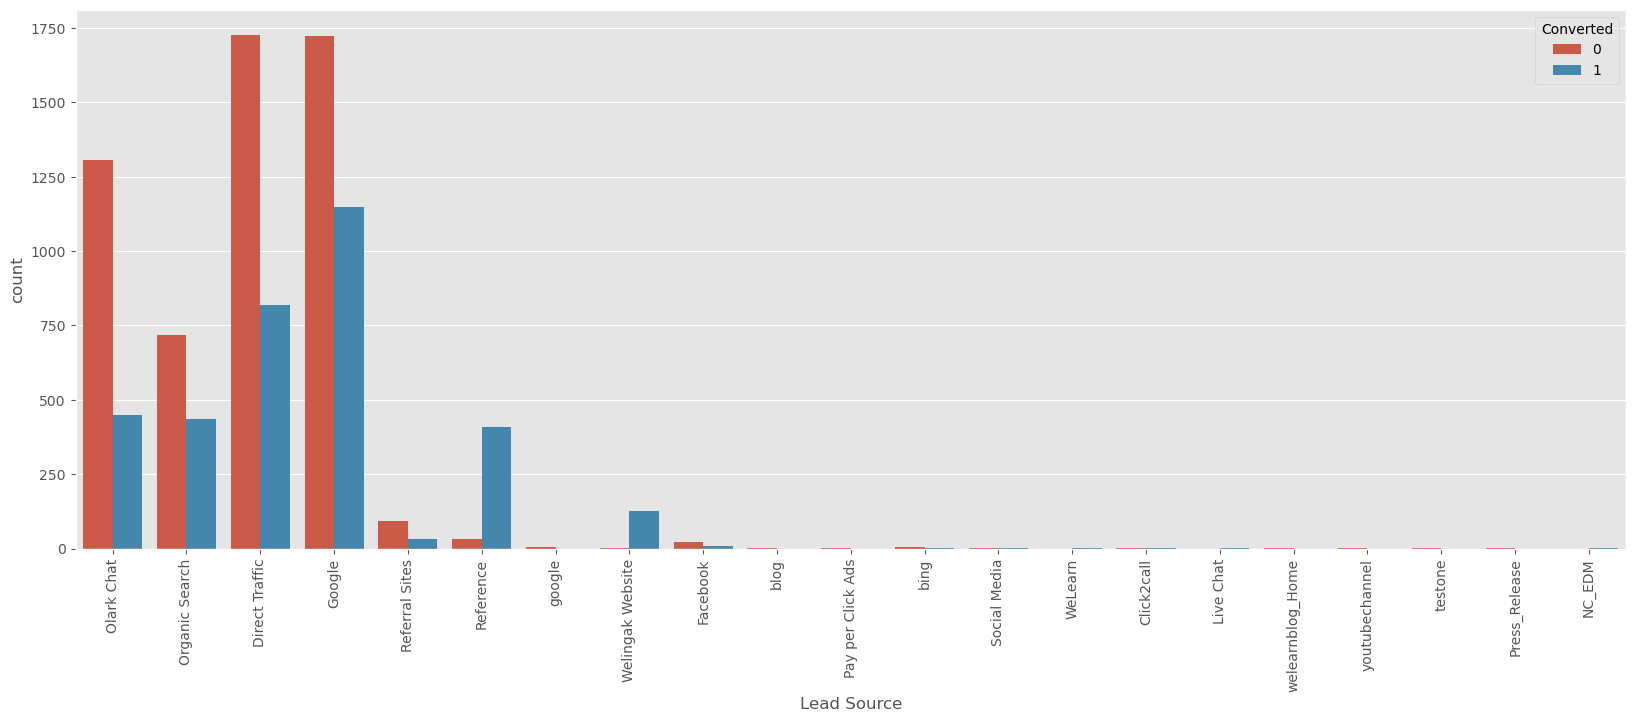

In [106]:
plot_cat_var(cat_var[1])

In [110]:
# To correct spelling error
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [112]:
categories = lead_df['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [113]:
# To reduce categories
lead_df['Lead Source'] = lead_df['Lead Source'].replace(categories[8:], 'Others')

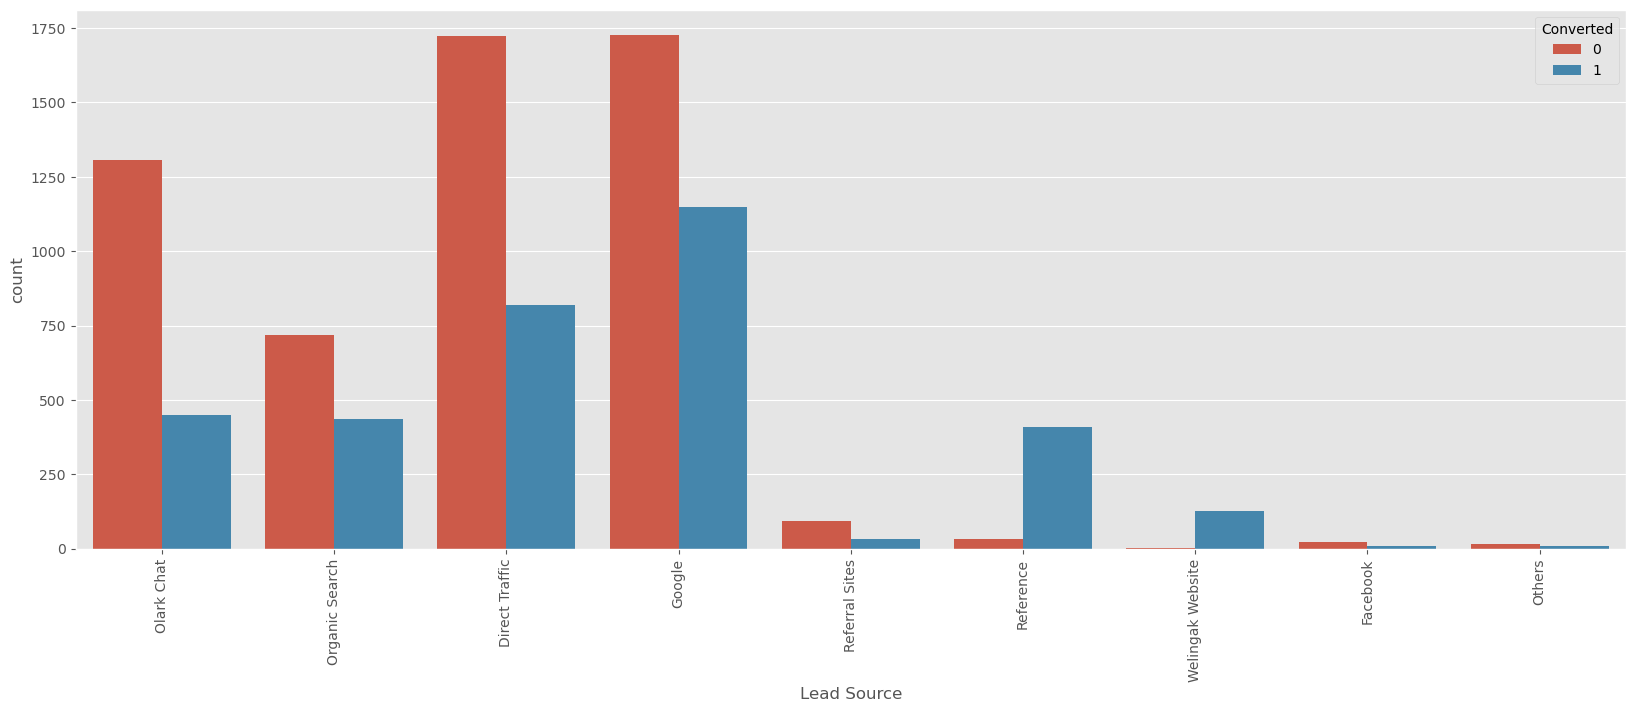

In [115]:
# To plot new categories
plot_cat_var(cat_var[1])

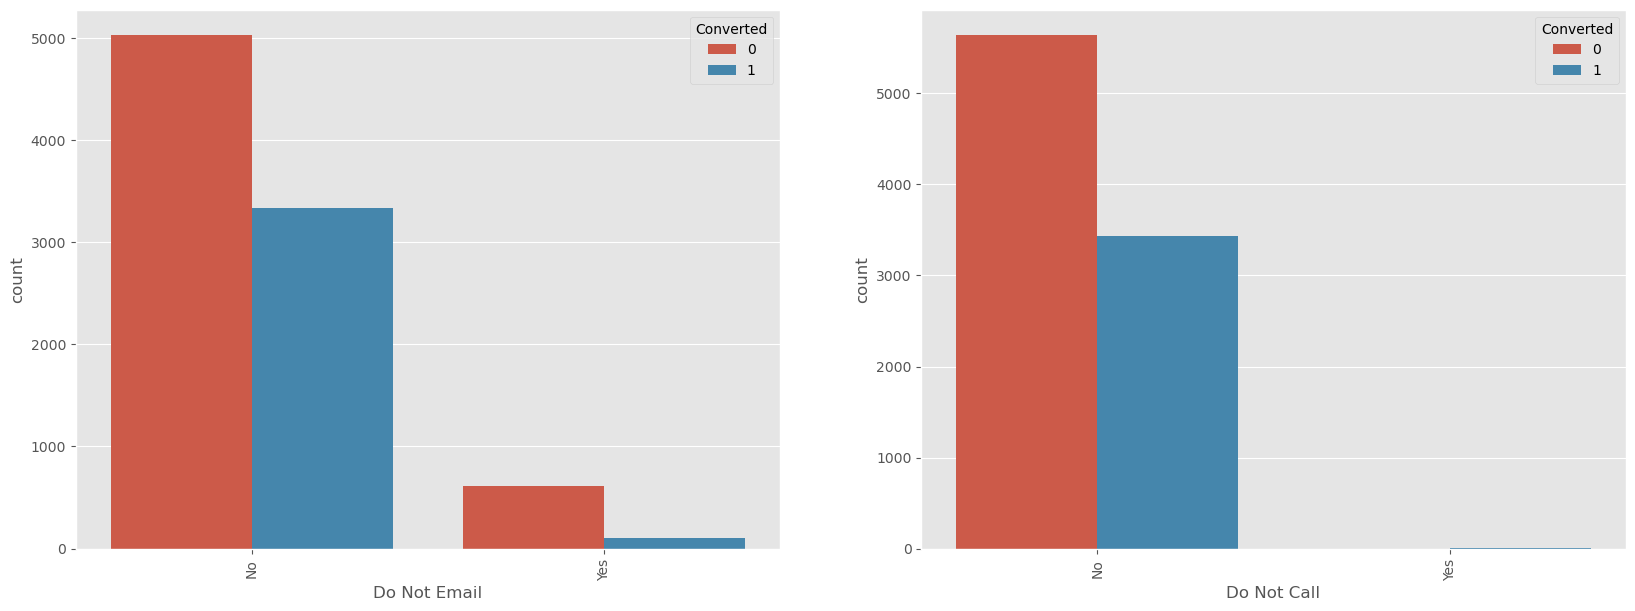

In [117]:
plot_cat_vars([cat_var[2],cat_var[3]])

###### **Observations for `Do Not Email` and `Do Not Call`:**  
As one can expect, most of the responses are 'No' for both the variables which generated most of the leads.

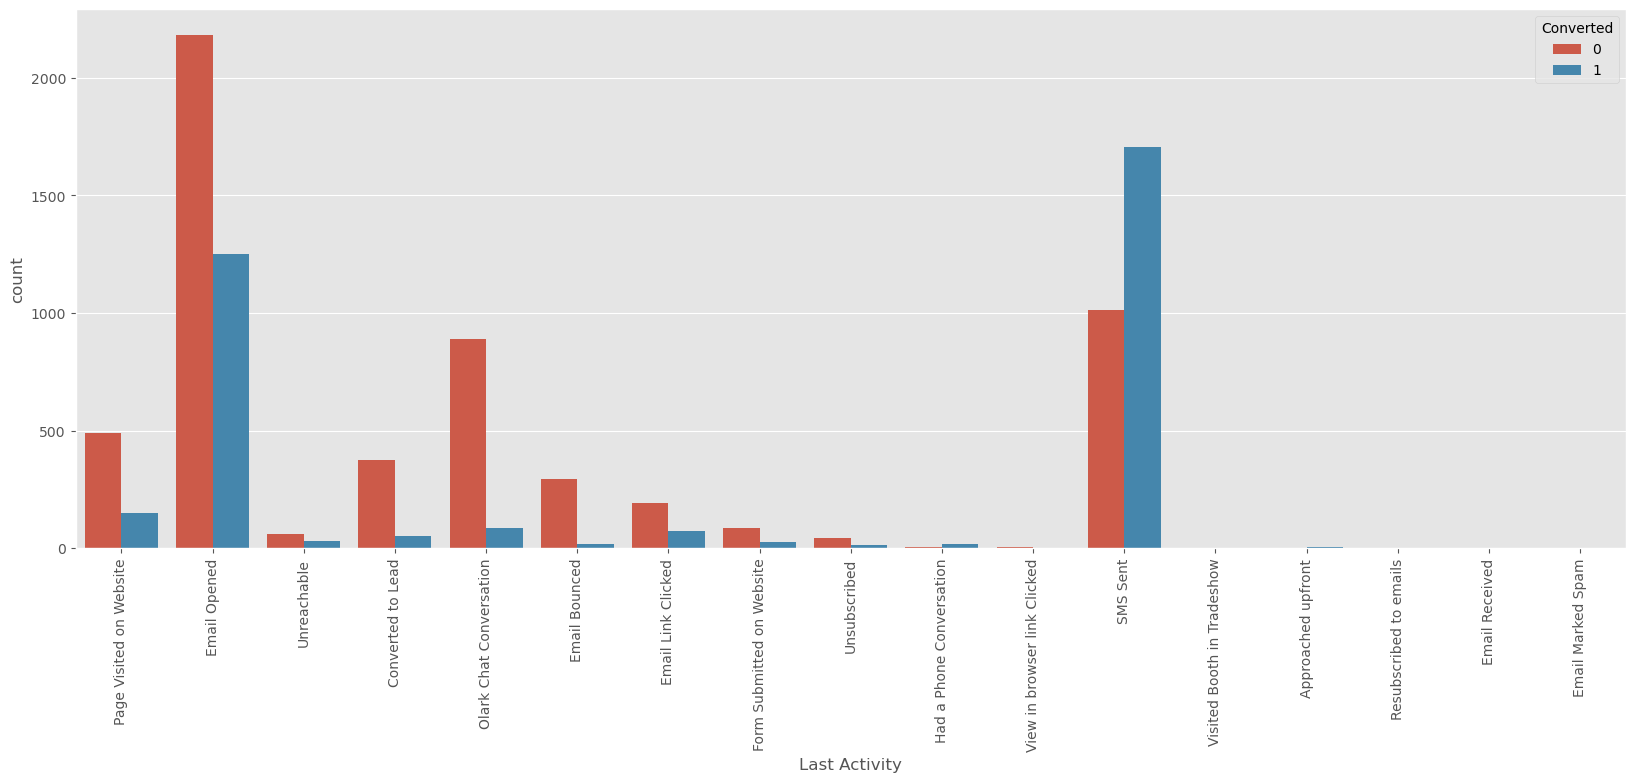

In [119]:
plot_cat_var(cat_var[4])

##### **Observations for `Last Activity`:**  
- Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
- Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [122]:
categories = lead_df['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

#### We can see that we do not require last five categories.

In [124]:
# To reduce categories
lead_df['Last Activity'] = lead_df['Last Activity'].replace(categories[-5:], 'Others')

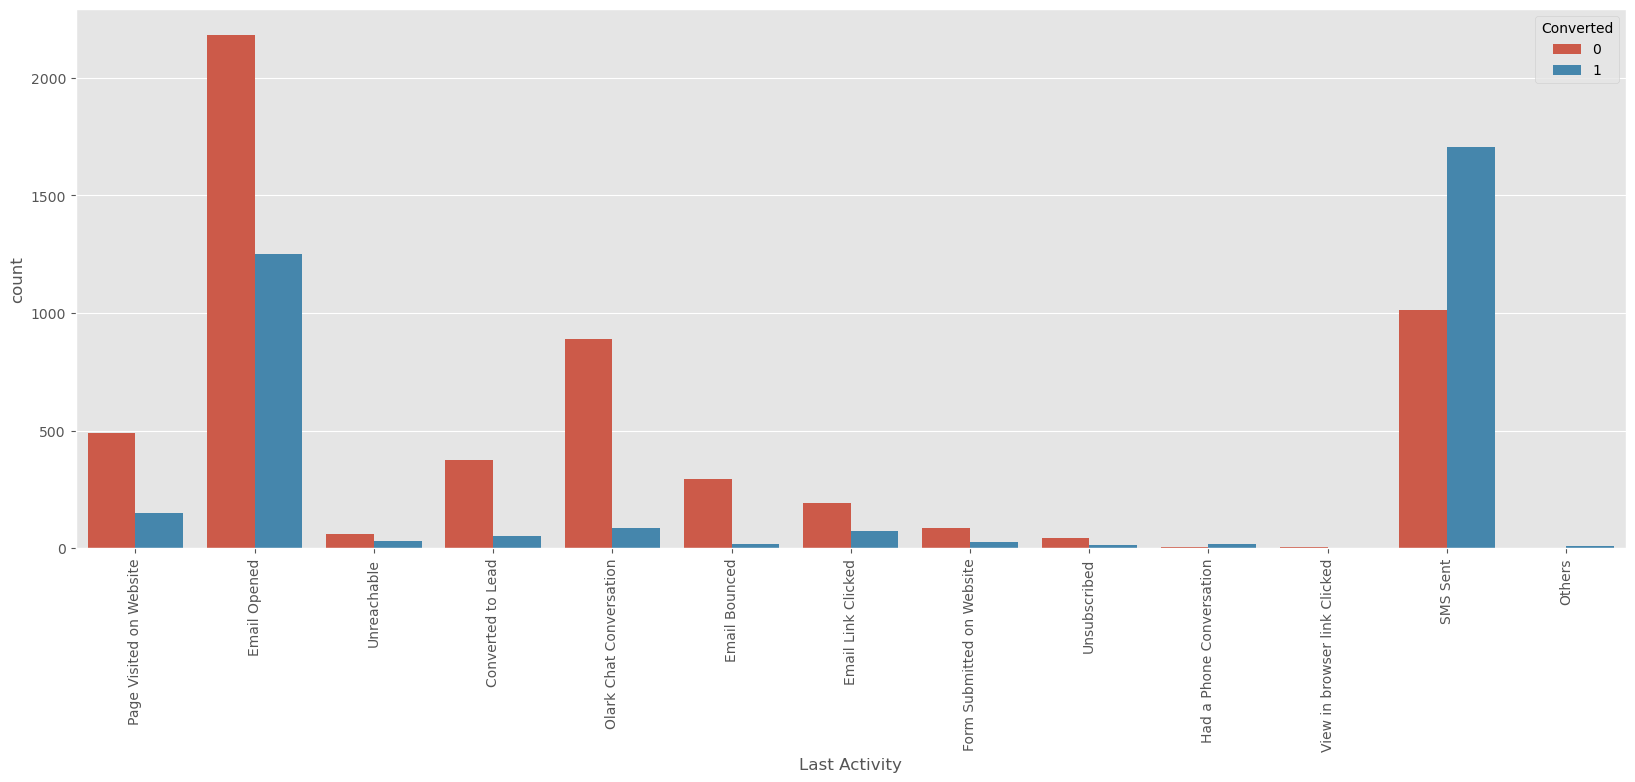

In [125]:
# To plot new categories
plot_cat_var(cat_var[4])

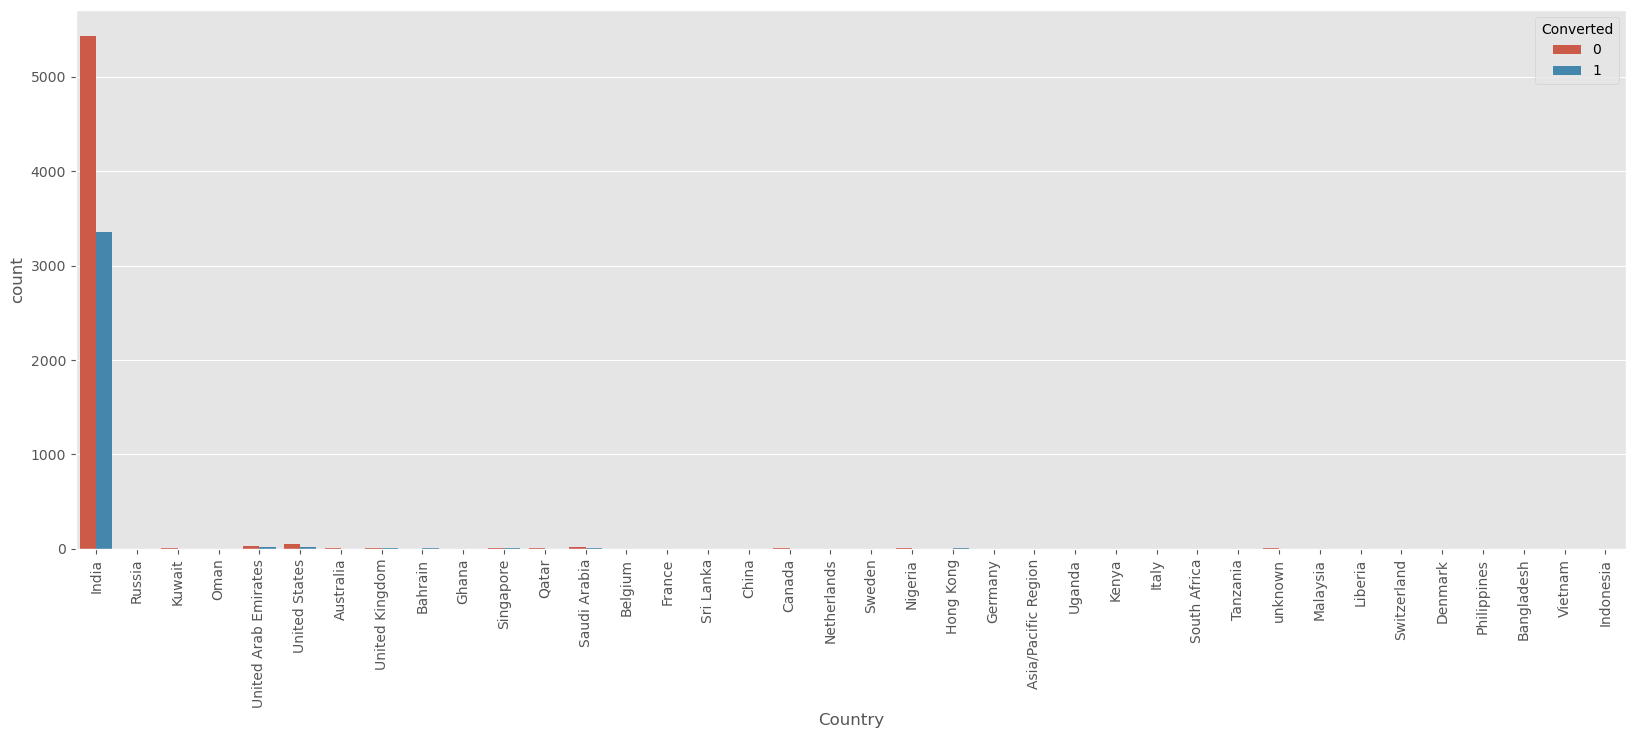

In [127]:
plot_cat_var(cat_var[5])

### **Observations for `Country`:**  
Most of the responses are for India. Others are not significant.

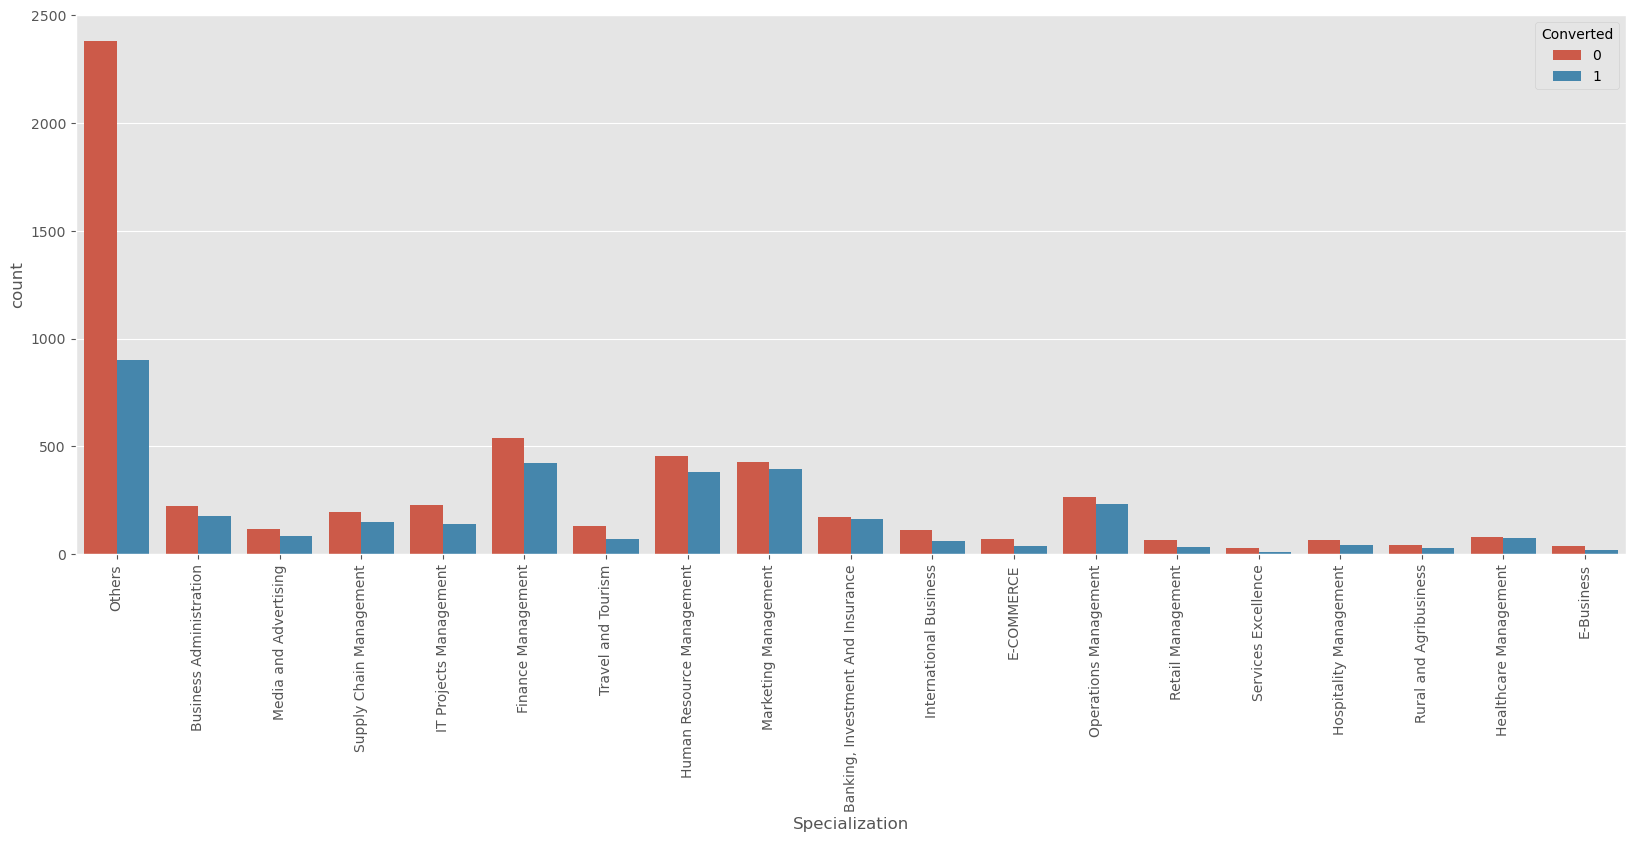

In [129]:
plot_cat_var(cat_var[6])

###### **Observations for `Specialization`:**  
Conversion rates are mostly similar across different specializations.

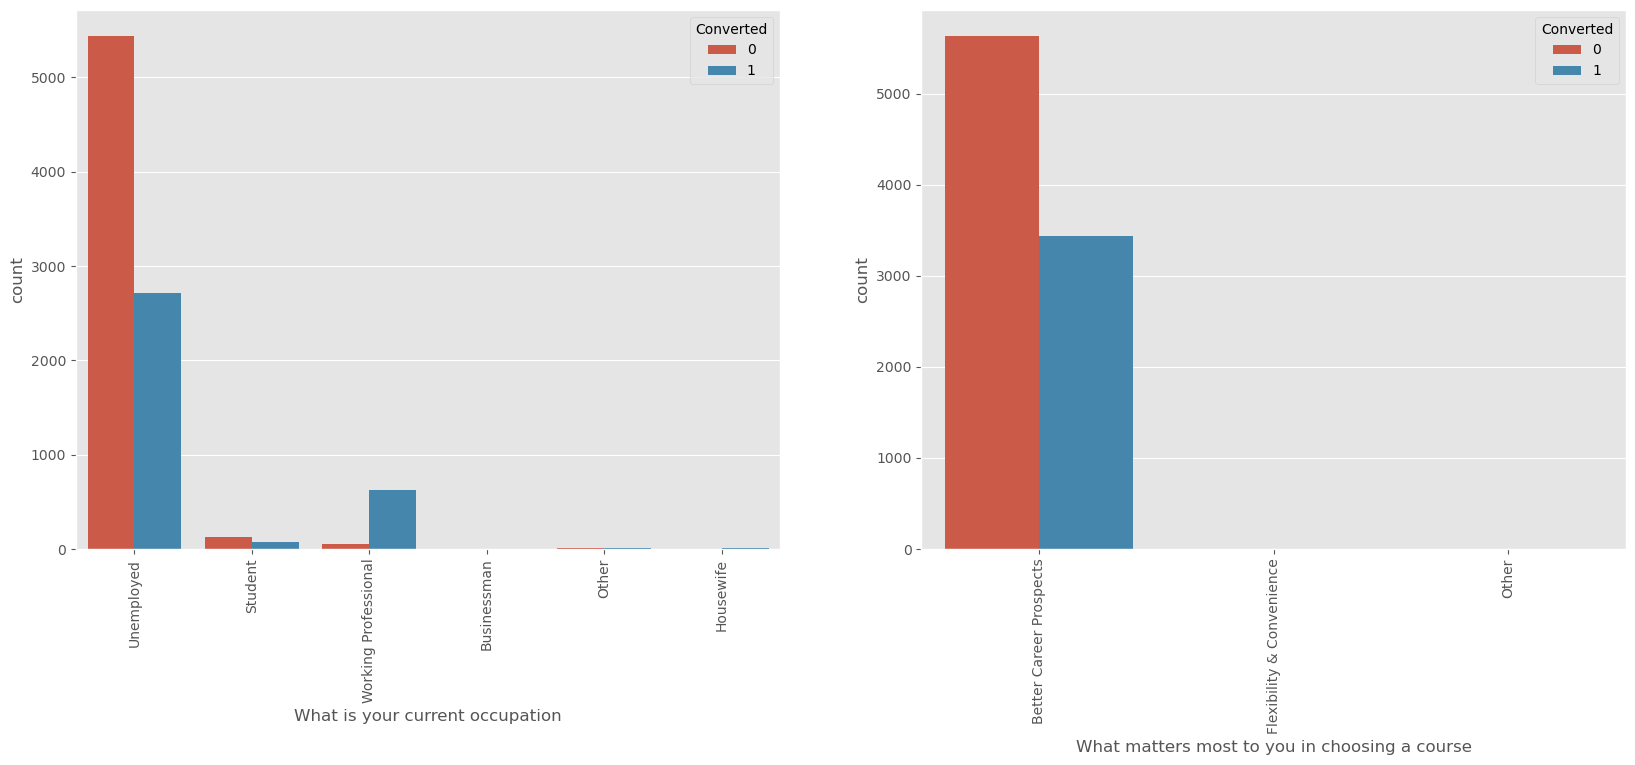

In [134]:
plot_cat_vars([cat_var[7],cat_var[8]])

###### **Observations for `What is your current occupation` and `What matters most to you in choosing a course`:**  
- The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.
- Variable 'What matters most to you in choosing a course' has only one category with significant count.

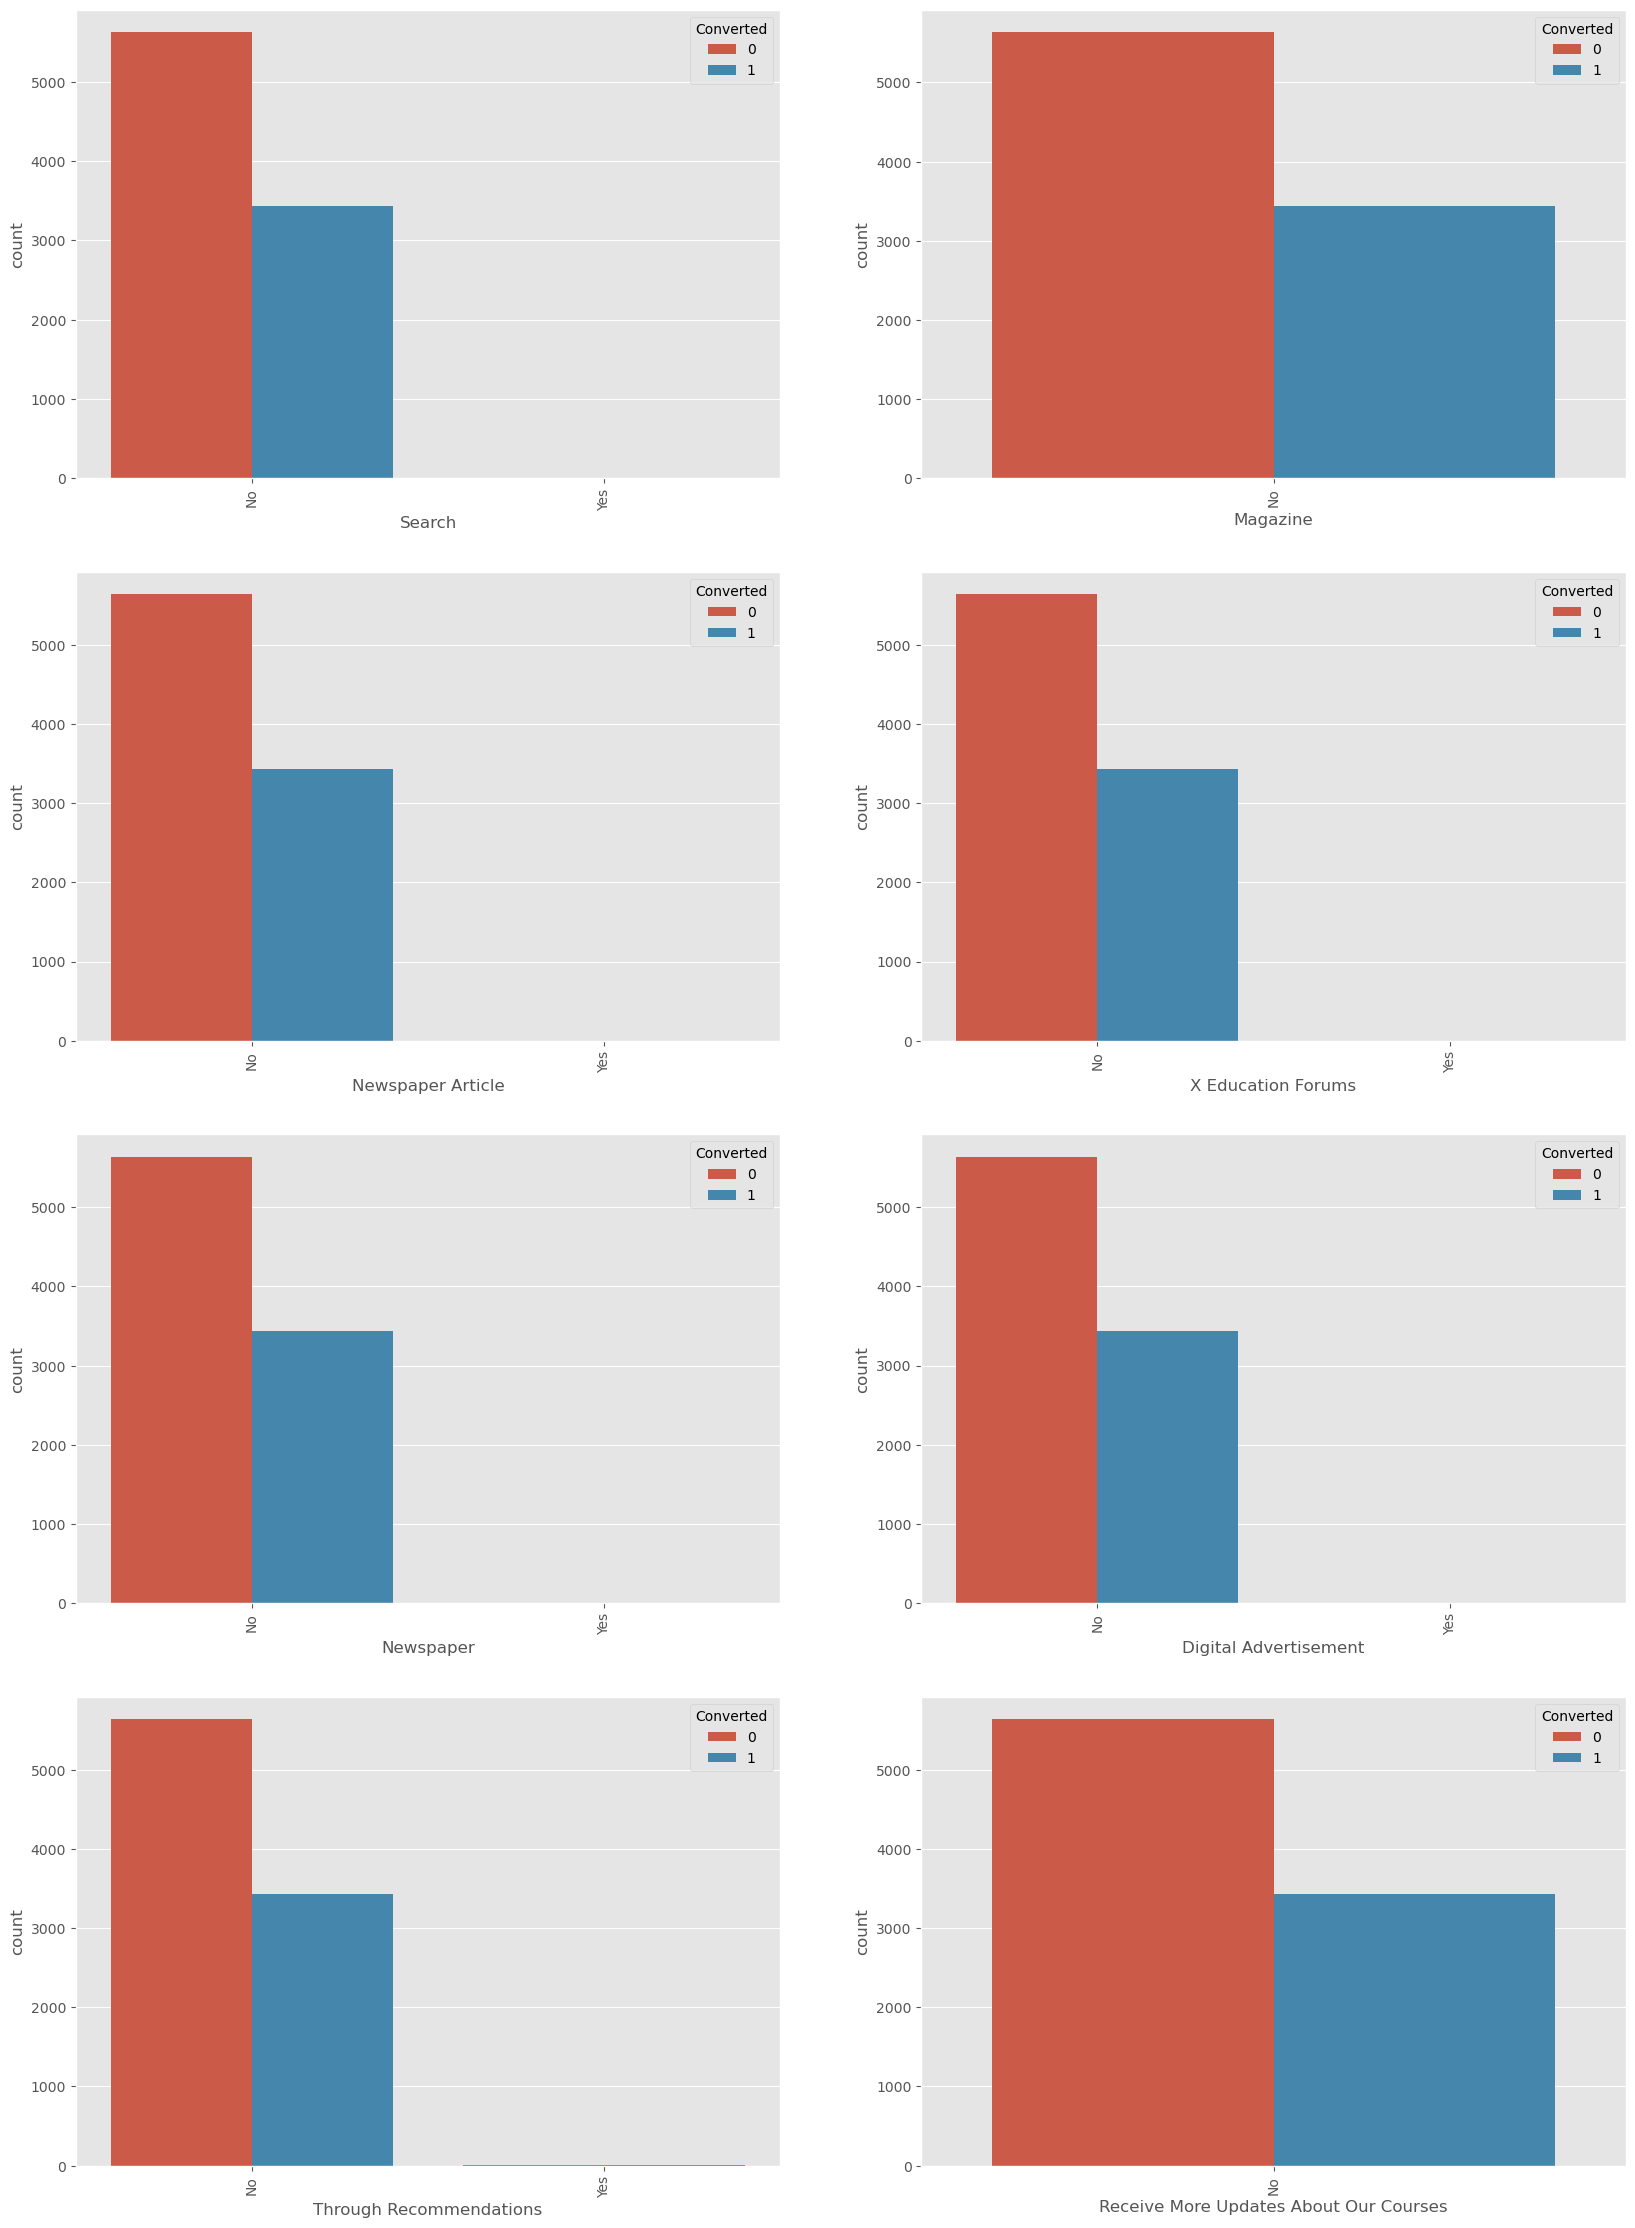

In [137]:
plot_cat_vars(cat_var[9:17])

###### **Observations for `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, and `Receive More Updates About Our Courses`:**  
As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

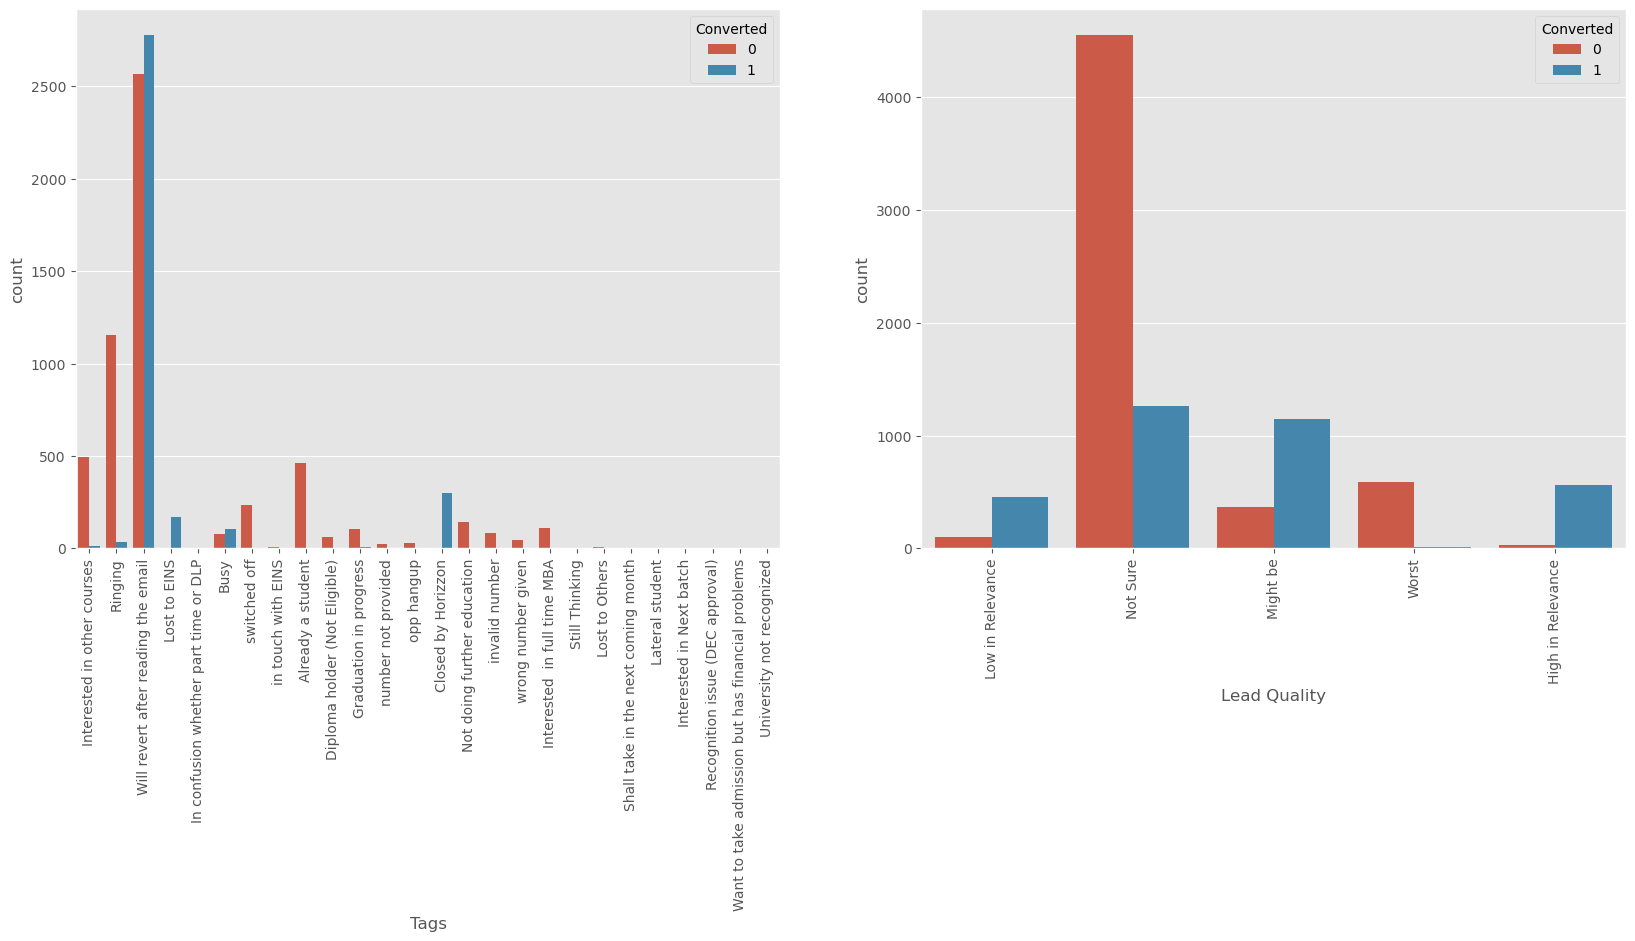

In [139]:
plot_cat_vars([cat_var[17],cat_var[18]])

###### **Observations for `Tags` and `Lead Quality`:**  
- In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.
- Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'.
- In Lead quality, as expected, 'Might be' as the highest conversion rate while 'Worst' has the lowest.

In [144]:
categories = lead_df['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

#### We can combine that last eight categories.

In [148]:
# To reduce categories
lead_df['Tags'] = lead_df['Tags'].replace(categories[-8:], 'Others')

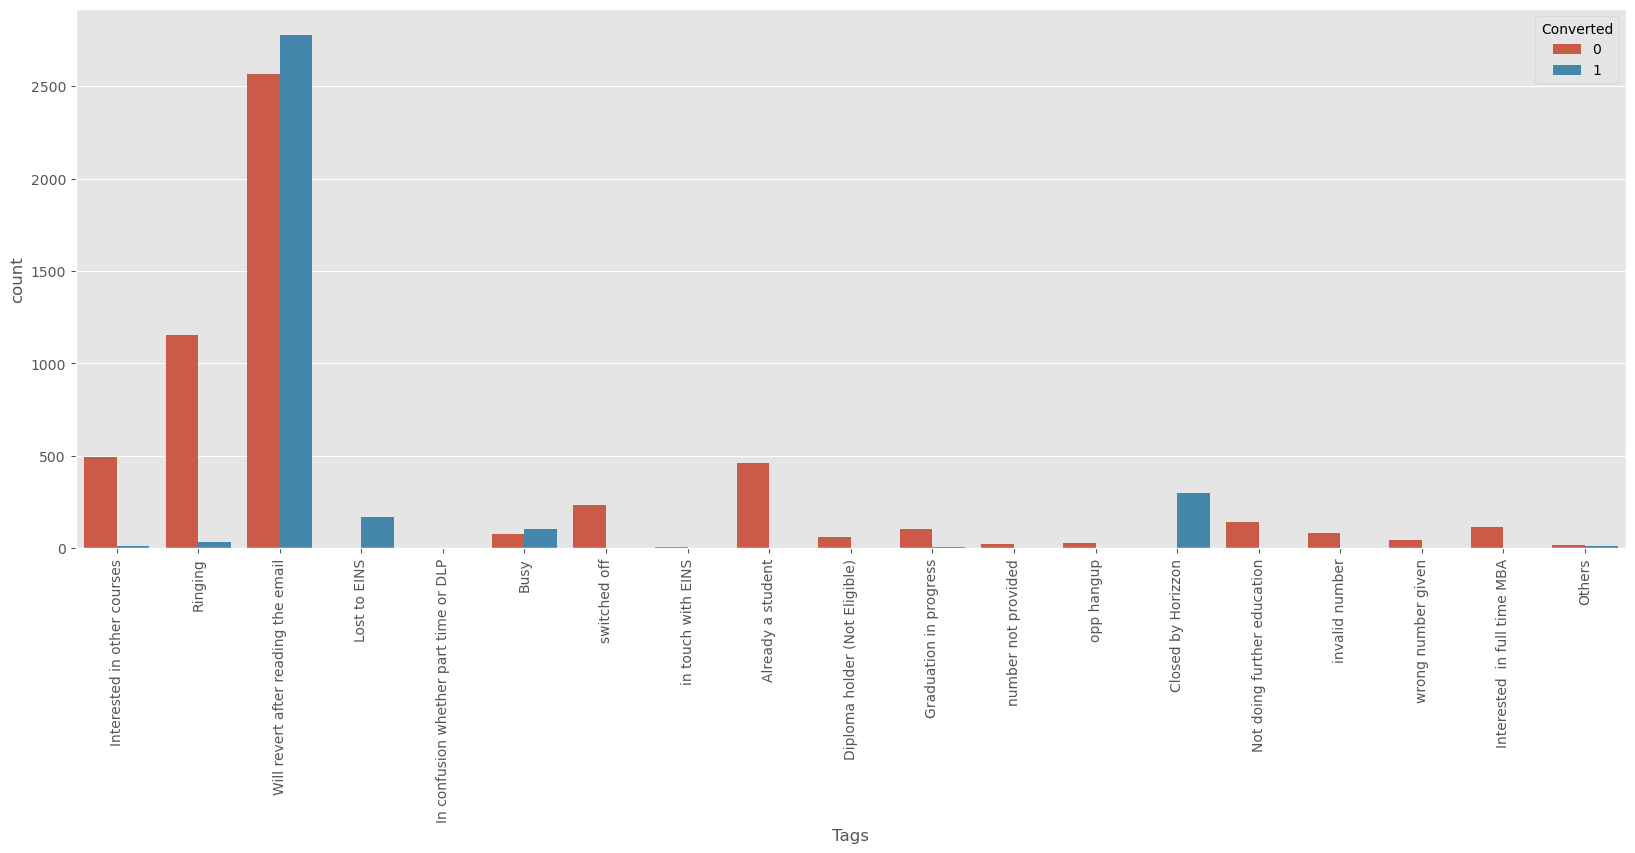

In [149]:
# To plot new categories
plot_cat_var(cat_var[17])

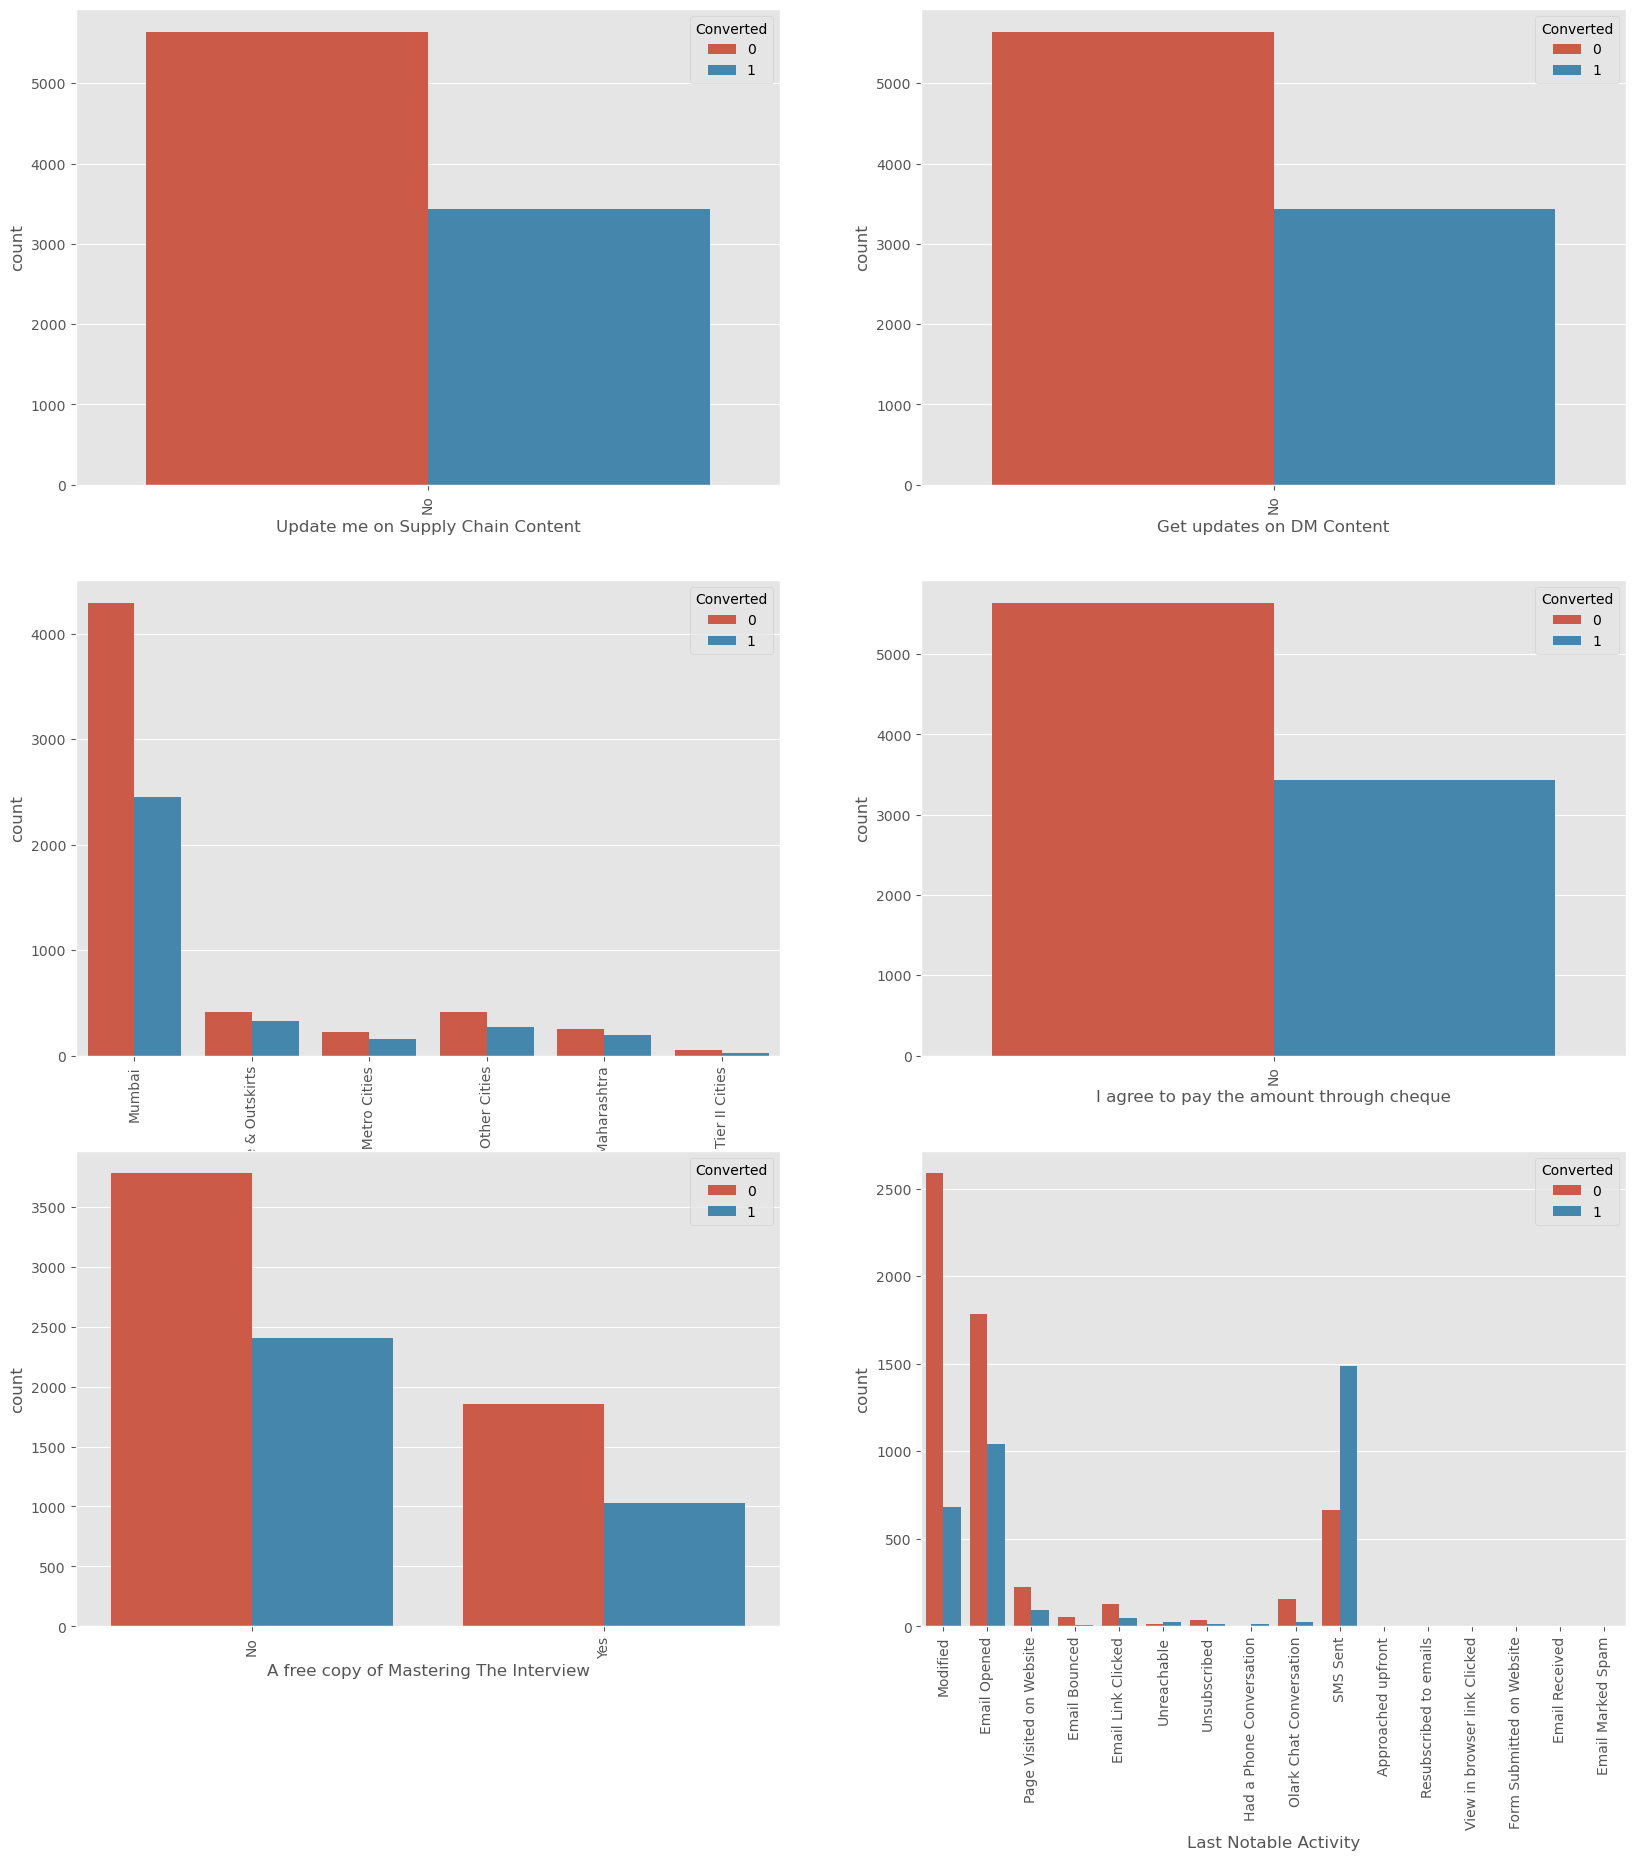

In [150]:
plot_cat_vars(cat_var[19:25])

###### **Observations for `Update me on Supply Chain Content`, `Get updates on DM Content`, `City`, `I agree to pay the amount through cheque`, `A free copy of Mastering The Interview`, and `Last Notable Activity` :

- In City, most of the leads are generated for 'Mumbai'.
In 'A free copy of Mastering The Interview', both categories have similar conversion rates.
- In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. - It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [155]:
categories = lead_df['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [157]:
# To reduce categories
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(categories[-6:], 'Others')

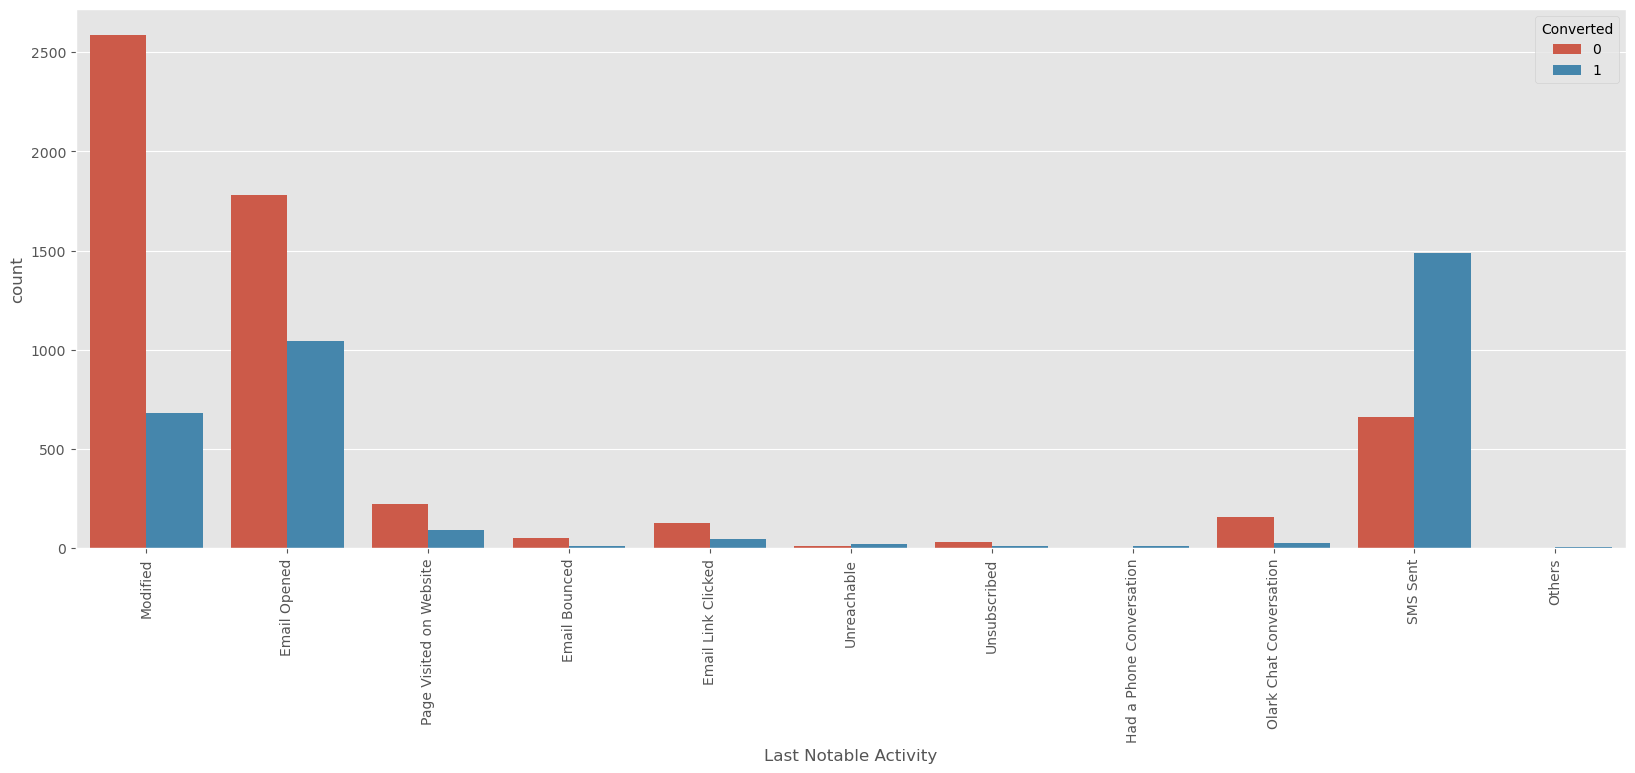

In [158]:
# To plot new categories
plot_cat_var(cat_var[24])

#### Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [163]:
lead_df = lead_df.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],axis = 1)


In [166]:
# Final DataFrame
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality    City Last Notable Activity  
0  Low in Relevance  Mumbai              Modified  
1          Not Sure  Mumbai          Email Opened  
2          Might be  Mumbai          Email Opened  
3          Not Sure  Mumbai              Modified  
4          Might be  Mumbai              Modified

In [168]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                     

In [170]:
lead_df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9074.000000  9074.000000                  9074.000000   
mean      0.378554     3.191867                   482.887481   
std       0.485053     2.780618                   545.256560   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    11.000000   
50%       0.000000     3.000000                   246.000000   
75%       1.000000     5.000000                   922.750000   
max       1.000000    10.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.265943  
std                1.790991  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max                6.000000

## Step 4: Data Preparation

In [173]:
# To convert binary variable (Yes/No) to 0/1
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

#### For categorical variables with multiple levels, we create dummy features (one-hot encoded).

In [177]:
# Categorical variables
cat_var = list(lead_df.columns[lead_df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [179]:
# Step 1: Convert boolean columns to integers (0 & 1)
lead_df = lead_df.astype({col: 'int' for col in lead_df.select_dtypes(include=['bool']).columns})

# Step 2: Identify categorical columns correctly
cat_var = list(lead_df.select_dtypes(include=['object', 'category']).columns)

# Step 3: Apply One-Hot Encoding only if categorical variables exist
if cat_var:
    dummy = pd.get_dummies(lead_df[cat_var], drop_first=True)
    lead_df = pd.concat([lead_df, dummy], axis=1)
    lead_df = lead_df.drop(cat_var, axis=1)  # Drop original categorical columns

In [181]:
lead_df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                False   
1                   2.5                                False   
2                   2.0                                 True   
3                   1.0                                 True   
4                   1.0                                 True   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                      False                    False                 False   
1                      False                    False                 False   
2                      False                    False                 False   
3                      False                    False                 False   
4                      False                    False                 False   

   Lead Source_Google  ...  Last Notable Activity_Email Link Clicked  \
0               False  ...                                     False   
1               False  ...                                     False   
2               False  ...                                     False   
3               False  ...                                     False   
4                True  ...                                     False   

   Last Notable Activity_Email Opened  \
0                               False   
1                                True   
2                                True   
3                               False   
4                               False   

   Last Notable Activity_Had a Phone Conversation  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Others  \
0                         False   
1                         False   
2                         False   
3                         False   
4                         False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   Last Notable Activity_Unsubscribed  
0                               False  
1                               False  
2                               False  
3                               False  
4                 

#### Train-Test Split

In [184]:
# Importing required package
from sklearn.model_selection import train_test_split

In [185]:
# To put feature variable to X
X = lead_df.drop(['Converted'],axis=1)
y = lead_df['Converted']

In [188]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [191]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()

In [195]:
# Numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [197]:
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                 True   
1012             -0.155018                                 True   
9226             -1.265540                                False   
4750             -0.155018                                 True   
7987              0.122613                                 True   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                      False                    False   
1012                      False                    False   
9226                      False                    False   
4750                      False                    False   
7987                      False                    False   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  ...  \
3009                 False               False                   False  ...   
1012                 False               False                   False  ...   
9226                 False               False                    True  ...   
4750                 False               False                   False  ...   
7987                 False               False                   False  ...   

      Last Notable Activity_Email Link Clicked  \
3009                                     False   
1012                                     False   
9226                                     False   
4750                                     False   
7987                                     False   

      Last Notable Activity_Email Opened  \
3009                                True   
1012                               False   
9226                               False   
4750                               False   
7987                               False   

      Last Notable Activity_Had a Phone Conversation  \
3009                                           False   
1012                                           False   
9226                                           False   
4750                                           False   
7987                                           False   

      Last Notable Activity_Modified  \
3009                           False   
1012                           False   
9226                            True   
4750                           False   
7987                            True   

      Last Notable Activity_Olark Chat Conversation  \
3009                                          False   
1012                                          False   
9226                                          False   
4750                                          False   
7987                                          False   

      Last Notable Activity_Others  \
3009                         False   
1012                         False   
9226                         False   
4750                         False   
7987                         False   

      Last Notable Activity_Page Visited on Website  \
3009                                          False   
1012                                          False   
9226                                          False   
4750                                          False   
7987                                          False   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                           False                              False   
1012                           False                              False   
9226                           False                              False   
4750                            True           

## Step 5: Model Building

#### Feature Selection Using RFE

In [201]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [203]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [204]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 69),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Others', False, 49),
 ('Lead Source_Reference', False, 68),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 54),
 ('Last Activity_Email Link Clicked', False, 40),
 ('Last Activity_Email Opened', False, 72),
 ('Last Activity_Form Submitted on Website', False, 71),
 ('Last Activity_Had a Phone Conversation', False, 16),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', False, 34),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last

In [207]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [209]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthca

#### Assessing the Model with StatsModels

In [212]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const', axis=1)  # ✅ Fix: Use axis=1
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [216]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [218]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [220]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

**Model 1**  
Running the first model by using the features selected by RFE

In [223]:
# Convert all boolean columns to int (0,1)
X_train = X_train.astype(int)

# Ensure all columns are numeric (int or float)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Drop any remaining NaN values
X_train = X_train.dropna()

# Now, call the build_model function
X1, logm1 = build_model(X_train[col], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1579.7
Date:                Mon, 17 Mar 2025   Deviance:                       3159.4
Time:                        09:43:23   Pearson chi2:                 3.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5664
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

`Tags_invalid number` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

Similarly `Tags_number not provided` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

**Model 2**

In [242]:
# Drop the 'Tags_number not provided' column from X_train (if it exists)
X_train = X_train.drop(['Tags_number not provided'], axis=1, errors='ignore')

# Define col2 with the remaining columns after dropping
col2 = X_train.columns  # This will contain all the remaining column names after dropping

# To rebuild the model
X3, logm3 = build_model(X_train[col2], y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           86
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1323.5
Date:                Mon, 17 Mar 2025   Deviance:                       2647.1
Time:                        09:49:31   Pearson chi2:                 5.41e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.6000
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

`Tags_wrong number given` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

#### Model 3

In [250]:
# Drop the 'Tags_wrong number given' column from X_train (if it exists)
X_train = X_train.drop(['Tags_wrong number given'], axis=1, errors='ignore')

# Define col3 with the remaining columns after dropping
col3 = X_train.columns  # This will contain all the remaining column names after dropping

# To rebuild the model
X4, logm4 = build_model(X_train[col3], y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1324.9
Date:                Mon, 17 Mar 2025   Deviance:                       2649.9
Time:                        09:53:00   Pearson chi2:                 5.37e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5998
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------


We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

In [253]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def check_VIF(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])]
    
    # Sort values by VIF in descending order
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

    # Print the output
    print(vif_data.to_string(index=False))

# Call the function with your dataset X4
check_VIF(X4)

                                            Features     VIF
                                               const 1358.89
          What is your current occupation_Unemployed   98.61
What is your current occupation_Working Professional   76.51
                           Lead Origin_Lead Add Form   74.44
                               Lead Source_Reference   58.12
                  Last Notable Activity_Email Opened   41.68
                      Last Notable Activity_Modified   40.81
                      Last Notable Activity_SMS Sent   36.60
                             Lead Origin_Lead Import   25.50
                                Lead Source_Facebook   25.48
             What is your current occupation_Student   24.56
                        Lead Source_Welingak Website   19.28
                               Specialization_Others    9.42
                          Last Activity_Email Opened    9.13
                              Last Activity_SMS Sent    8.55
       Last Notable Acti

<Axes: >

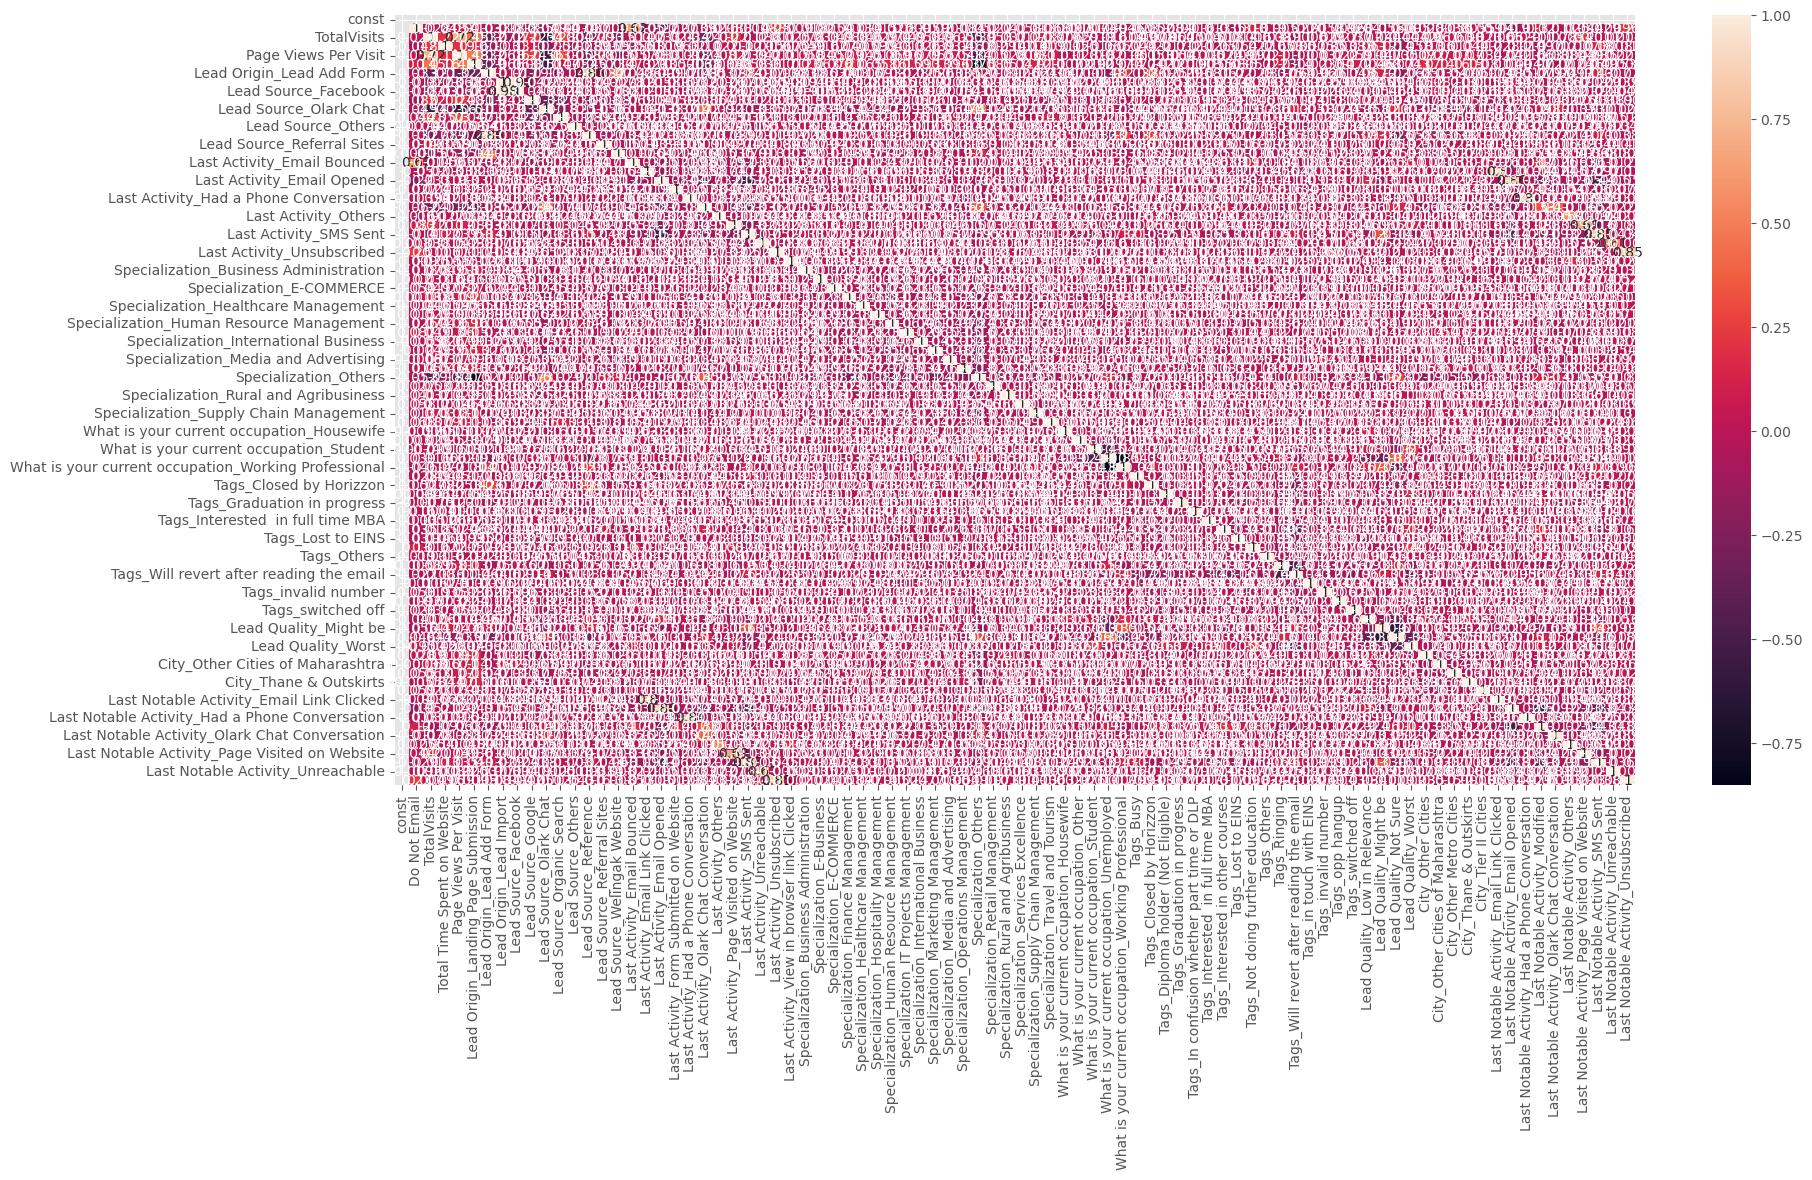

In [255]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

###### From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [258]:
# Get the features that were used to train logm4
expected_features = logm4.params.index.tolist()

# Reorder X4 columns to match the trained model and add missing columns (if any)
for col in expected_features:
    if col not in X4.columns:
        X4[col] = 0  # Add missing columns with default value 0

# Ensure the order matches the model's expectations
X4 = X4[expected_features]

In [260]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4, logm4)
y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.117035     3009          0
1          0        0.141401     1012          0
2          0        0.001341     9226          0
3          1        0.894191     4750          1
4          1        0.998463     7987          1

In [262]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3722  183]
 [ 298 2148]]
Training Accuracy:  0.9242638954495355


### | Predicted/Actual | Not converted Leads | Converted Leads |
    | --- | --- | --- |
    | Not converted Leads | 3753 | 152 |
    | Converted Leads | 567 | 1879 |

In [265]:
other_metrics(confusion)

Sensitivity:  0.8781684382665577
Specificity:  0.9531370038412292
False postive rate:  0.046862996158770806
Positive predictive value:  0.9214929214929215
Negative predictive value:  0.9258706467661691


This is our **final model**:

1.  majorly handled all those variables with high p values
2.  We have checked for  colinearity among the feature variables
3.  Training accuracy of 88.67% at a probability threshold of 0.05 is also very good.

## Step 6: Model Evaluation

### Plotting the ROC Curve

###### An ROC curve signifies:

- tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [271]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [273]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

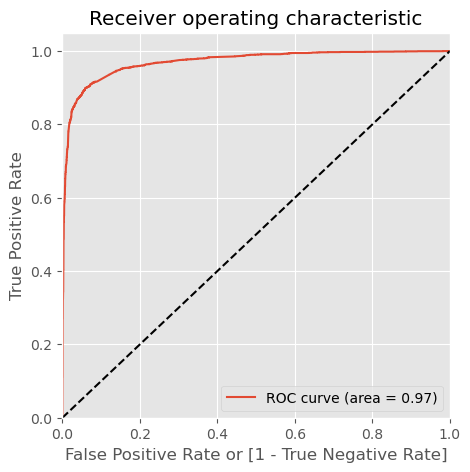

In [275]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [277]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9703013517064627


#### Finding Optimal Cutoff Point

Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [282]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.117035     3009          0    1    1    0    0    0   
1          0        0.141401     1012          0    1    1    0    0    0   
2          0        0.001341     9226          0    1    0    0    0    0   
3          1        0.894191     4750          1    1    1    1    1    1   
4          1        0.998463     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    1    1    1    1    1

In [284]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.819084  0.970973  0.723944
0.2   0.2  0.884585  0.953393  0.841485
0.3   0.3  0.920013  0.910466  0.925992
0.4   0.4  0.924421  0.899428  0.940077
0.5   0.5  0.924264  0.878168  0.953137
0.6   0.6  0.924736  0.856092  0.967734
0.7   0.7  0.919068  0.826656  0.976953
0.8   0.8  0.891828  0.742028  0.985659
0.9   0.9  0.867895  0.670074  0.991805


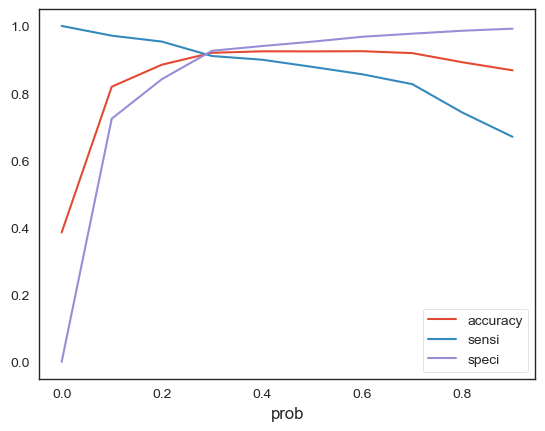

In [286]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [289]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.117035     3009          0    1    1    0    0    0   
1          0        0.141401     1012          0    1    1    0    0    0   
2          0        0.001341     9226          0    1    0    0    0    0   
3          1        0.894191     4750          1    1    1    1    1    1   
4          1        0.998463     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    1    1    1    1    1                1

In [291]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3286  619]
 [ 114 2332]]
Training Accuracy:  0.8845851047079201


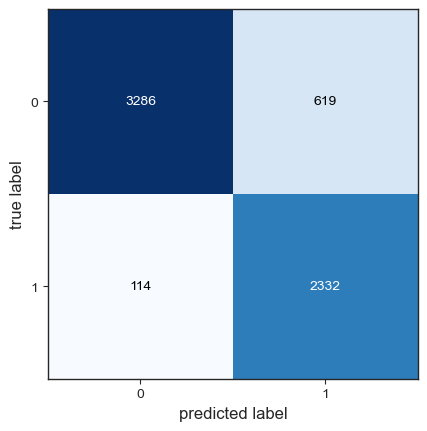

In [299]:
# To plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion2)
plt.show()

In [301]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.9533932951757972
Specificity:  0.8414852752880921
False postive rate:  0.1585147247119078
Positive predictive value:  0.7902405964079973
Negative predictive value:  0.9664705882352941


#### Classification Report 

In [304]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3905
           1       0.79      0.95      0.86      2446

    accuracy                           0.88      6351
   macro avg       0.88      0.90      0.88      6351
weighted avg       0.90      0.88      0.89      6351



## Step 7: Precision and Recall

In [307]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9214929214929215

### Recall = TP / TP + FN

In [310]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8781684382665577

In [313]:
from sklearn.metrics import precision_score, recall_score

In [315]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9214929214929215

In [317]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8781684382665577

### Precision and Recall Tradeoff

In [320]:
from sklearn.metrics import precision_recall_curve

In [322]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

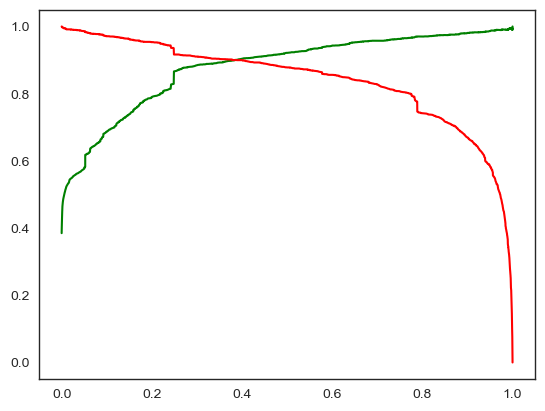

In [324]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### From the curve above, 0.25 is the optimum point to take as a cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.

In [327]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.117035     3009          0    1    1    0    0    0   
1          0        0.141401     1012          0    1    1    0    0    0   
2          0        0.001341     9226          0    1    0    0    0    0   
3          1        0.894191     4750          1    1    1    1    1    1   
4          1        0.998463     7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  final_predicted_pr  
0    0    0    0    0    0                0                   0  
1    0    0    0    0    0                0                   0  
2    0    0    0    0    0                0                   0  
3    1    1    1    1    0                1                   1  
4    1    1    1    1    1                1                   1

In [329]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3560  345]
 [ 204 2242]]
Training Accuracy:  0.913556920170052


In [331]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.9165985282093213
Specificity:  0.911651728553137
False postive rate:  0.088348271446863
Positive predictive value:  0.8666408967916506
Negative predictive value:  0.9458023379383634


###### Accuracy and other metrics yield similar values for both the cutoffs. We'll use the cutoff of 0.25 as derived earlier for predictions on the test set.

#### Step 8: Prediction on test set

In [335]:
# Feature transform on Test set
X_test = X_test.astype(int)

# Apply feature scaling only on numeric variables
X_test[num_var] = scaler.transform(X_test[num_var])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3271             0     0.284772                    -0.600595   
1490             0     0.643547                     1.887326   
7936             0    -0.432779                    -0.752879   
4216             0    -1.150329                    -0.888650   
3830             0     1.719873                    -0.587751   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3271              0.955505                                    0   
1490              1.510766                                    1   
7936             -0.155018                                    0   
4216             -1.265540                                    0   
3830              2.066027                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3271                          0                        0   
1490                          0                        0   
7936                          0                        0   
4216                          1                        0   
3830                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  ...  \
3271                     0                   1                       0  ...   
1490                     0                   0                       0  ...   
7936                     0                   1                       0  ...   
4216                     0                   0                       0  ...   
3830                     0                   0                       0  ...   

      Last Notable Activity_Email Link Clicked  \
3271                                         0   
1490                                         0   
7936                                         0   
4216                                         0   
3830                                         0   

      Last Notable Activity_Email Opened  \
3271                                   1   
1490                                   1   
7936                                   1   
4216                                   0   
3830                                   1   

      Last Notable Activity_Had a Phone Conversation  \
3271                                               0   
1490                                               0   
7936                                               0   
4216                                               0   
3830                                               0   

      Last Notable Activity_Modified  \
3271                               0   
1490                               0   
7936                               0   
4216                               1   
3830                               0   

      Last Notable Activity_Olark Chat Conversation  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_Others  \
3271                             0   
1490                             0   
7936                             0   
4216                             0   
3830                             0   

      Last Notable Activity_Page Visited on Website  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3271                               0                                  0   
1490                               0                                  0   
7936                               0                                  0   
4216                               0           

In [337]:
# To get final features
X_test_sm = X_test[col3]

In [339]:
# Select relevant columns, remove duplicates, and add constant
X_test_sm = sm.add_constant(X_test.loc[:, ~X_test.columns.duplicated()][logm4.params.index[1:]], has_constant="add")

# Convert everything to float (fixes 'exp' error)
X_test_sm = X_test_sm.astype(float)

# Check for NaNs and fill with 0 (or other appropriate value)
X_test_sm = X_test_sm.fillna(0)

# Predict
y_test_pred = logm4.predict(X_test_sm)

In [341]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

0
3271  0.097093
1490  0.994354
7936  0.090047
4216  0.999173
3830  0.052337

In [343]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [345]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

Converted  Lead ID  Converted_prob
0          0     3271        0.097093
1          1     1490        0.994354
2          0     7936        0.090047
3          1     4216        0.999173
4          0     3830        0.052337

In [347]:
# To put the threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_pred_final.head()

Converted  Lead ID  Converted_prob  final_predicted
0          0     3271        0.097093                0
1          1     1490        0.994354                1
2          0     7936        0.090047                0
3          1     4216        0.999173                1
4          0     3830        0.052337                0

In [349]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9620493828888242


In [351]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1571  163]
 [  81  908]]
Training Accuracy:  0.9103929489533603


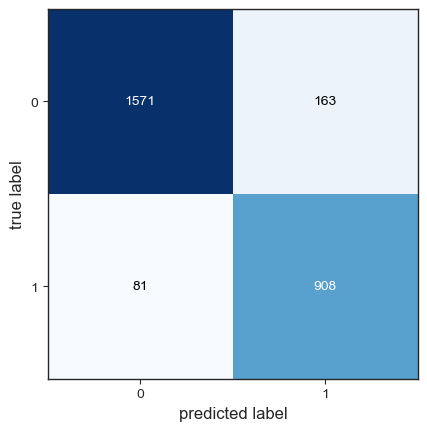

In [353]:
# To plot confusion matrix
plot_confusion_matrix(conf_mat=confusion_test)
plt.show()

 | Predicted/Actual | Not converted Leads | Converted Leads |
    | --- | --- | --- |
    | Not converted Leads | 1635 | 95 |
    | Converted Leads | 158 | 831 |

In [356]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.9180990899898888
Specificity:  0.9059976931949251
False postive rate:  0.09400230680507497
Positive predictive value:  0.8478057889822596
Negative predictive value:  0.9509685230024213


### Classification Report

In [359]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1734
           1       0.85      0.92      0.88       989

    accuracy                           0.91      2723
   macro avg       0.90      0.91      0.90      2723
weighted avg       0.91      0.91      0.91      2723



## Conclusions